# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, Birch, MeanShift, AffinityPropagation
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Data Analysis

In [2]:
data=pd.read_csv("Bank_Credit_Card.csv")
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
data.shape

(8950, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

First column which names CUST_ID, that stands for customer ID(Identification of Credit Card holder (Categorical)), does not reflect any useful information about the data.

In [5]:
data.drop('CUST_ID', axis = 1, inplace = True)

Now all the features are of numerical type

In [6]:
data.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

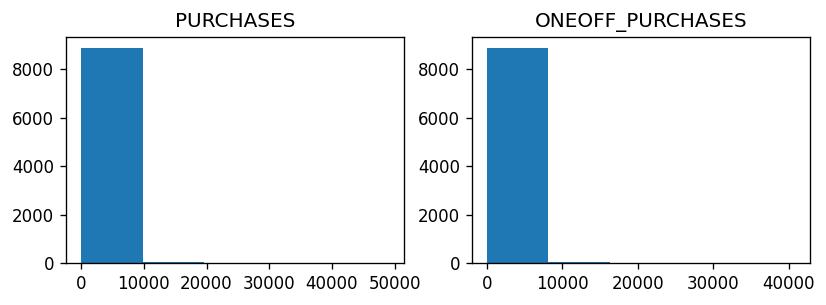

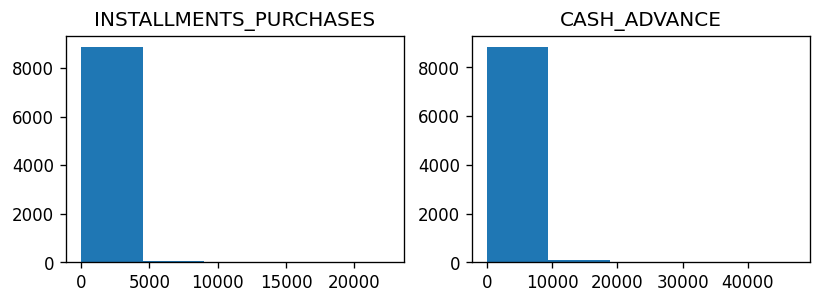

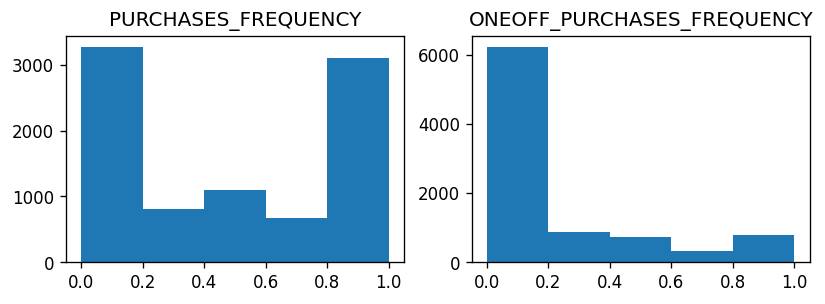

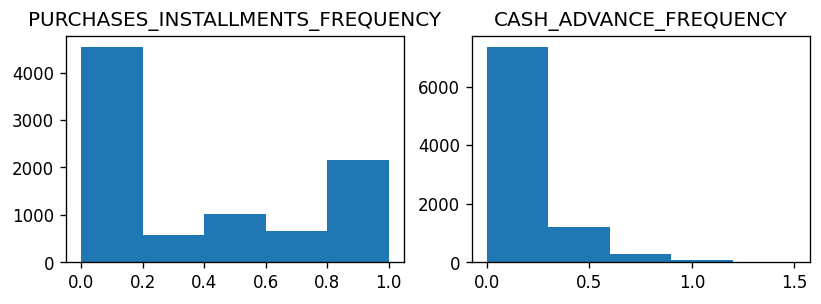

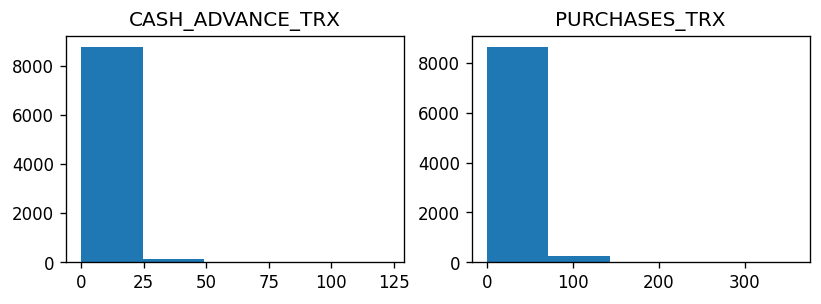

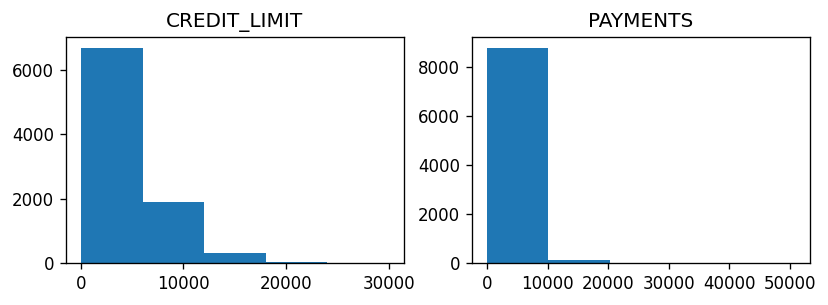

In [7]:
i=0
while i<len(data.columns)-1:   
    fig = plt.figure(figsize = (8, 2.5), dpi = 120)
    plt.subplot(1,2,1)
    plt.hist(data[data.columns[i]], bins = 5)
    plt.title(data.columns[i])
    i+=1
    plt.subplot(1,2,2)
    plt.hist(data[data.columns[i]], bins = 5)
    plt.title(data.columns[i])
    i+=1
plt.show()

#### Outlier Detection

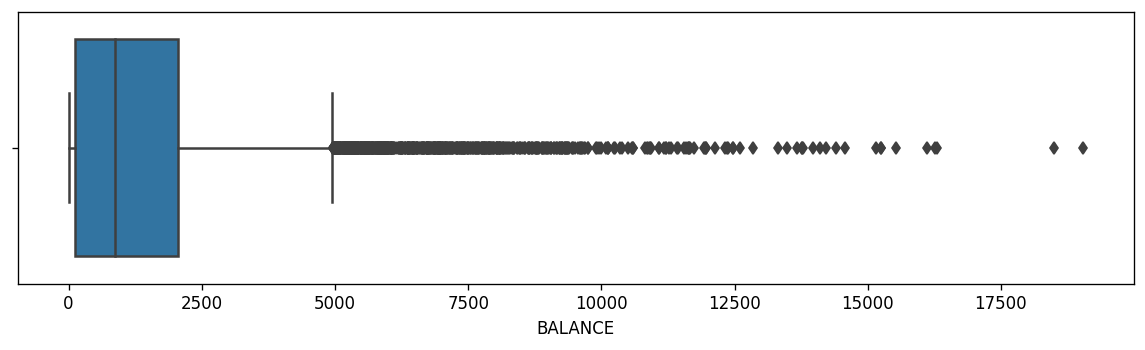

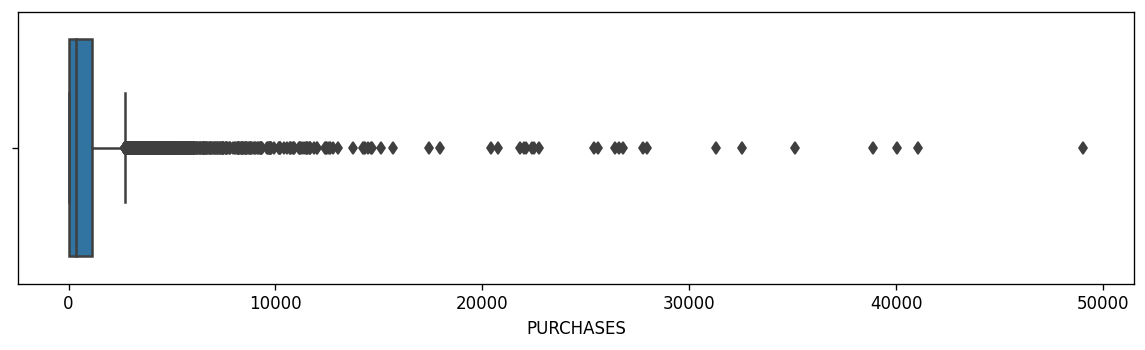

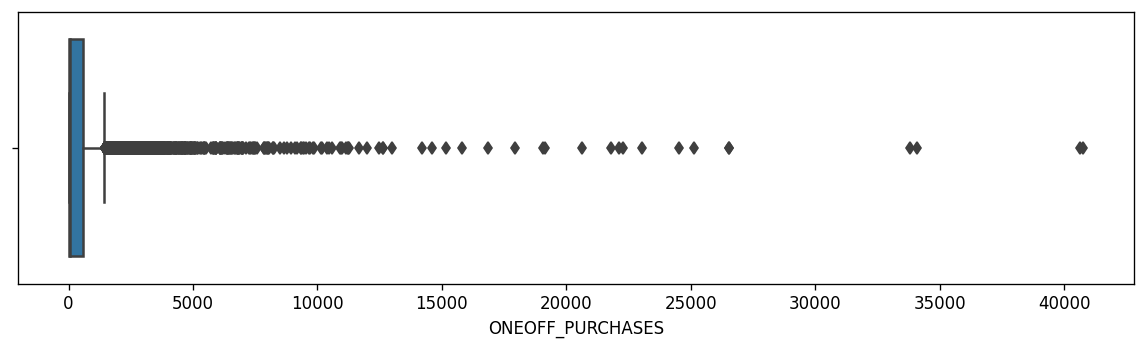

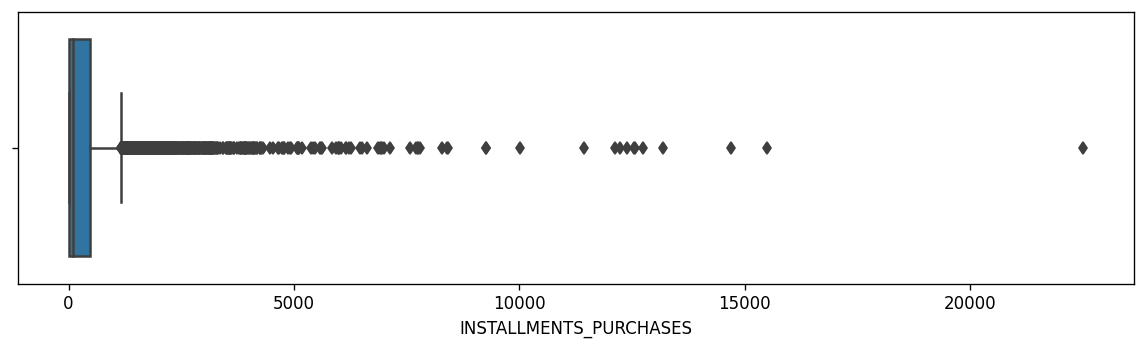

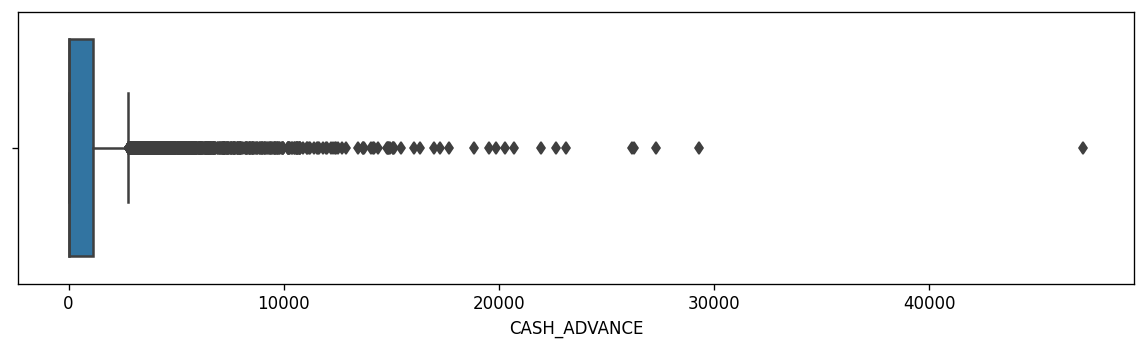

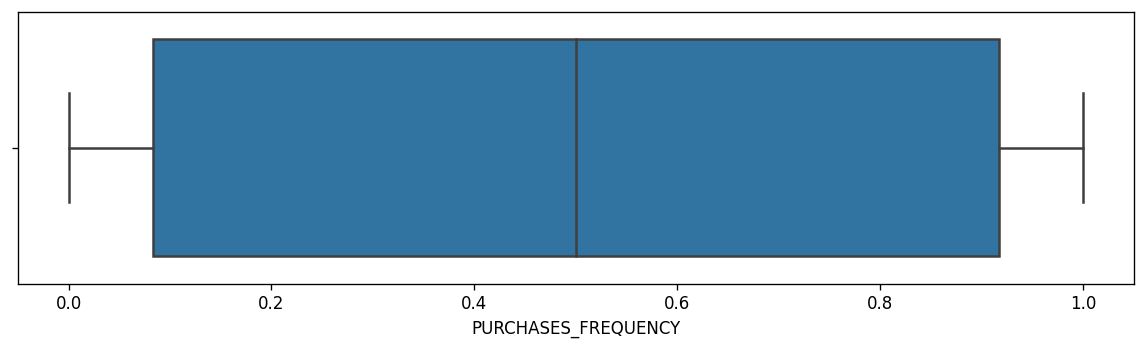

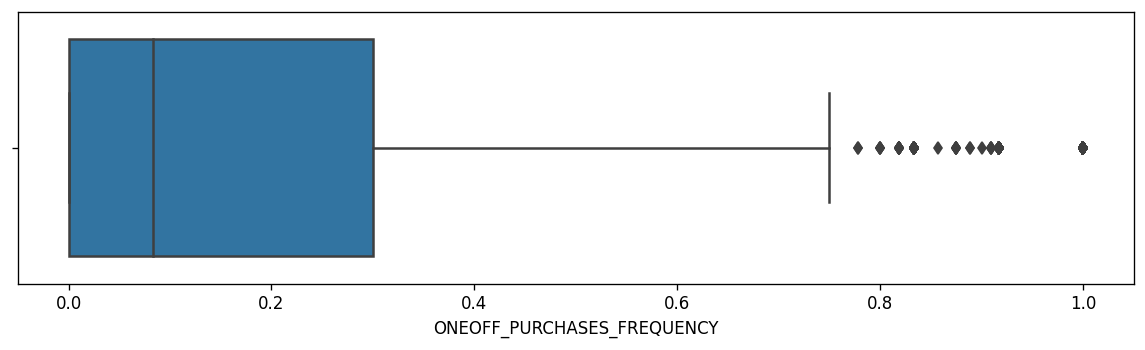

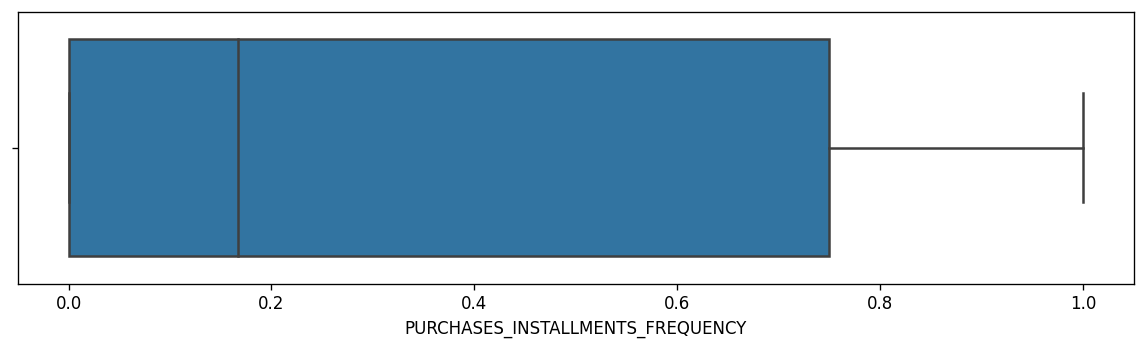

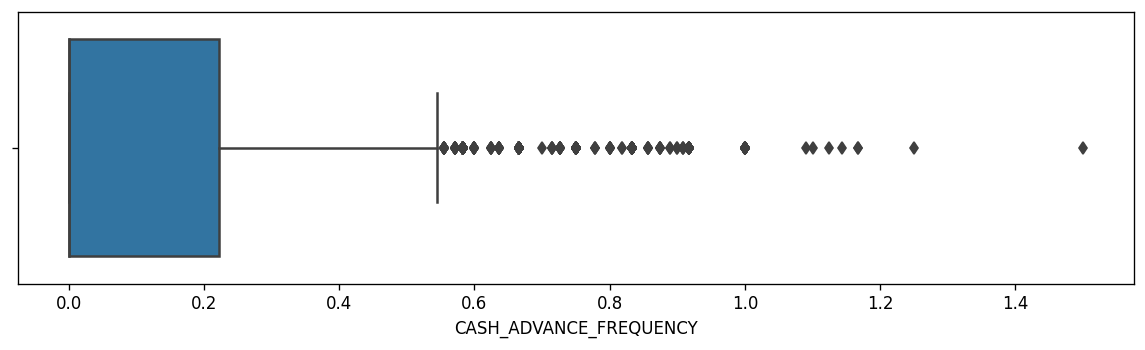

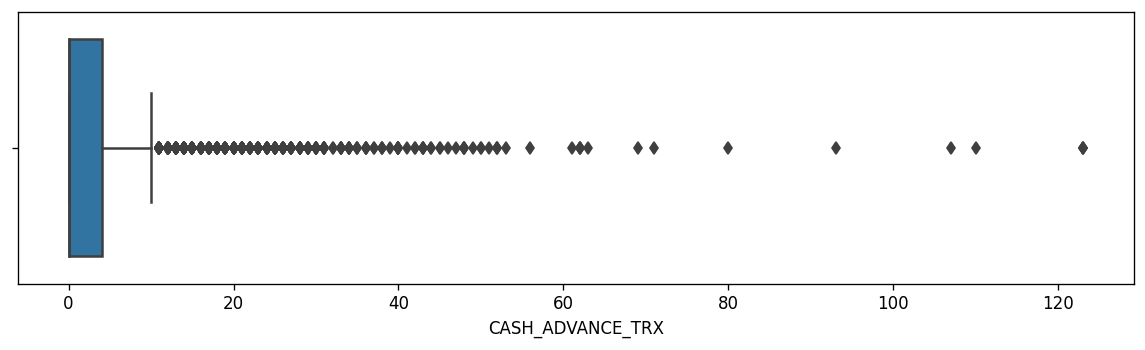

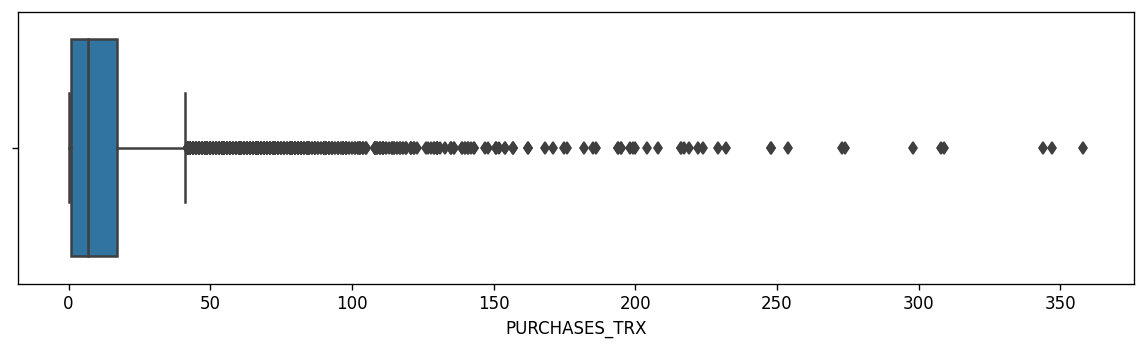

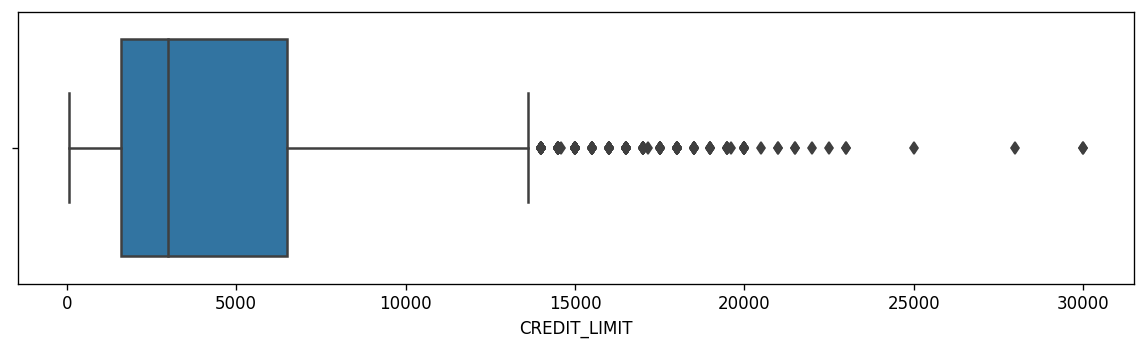

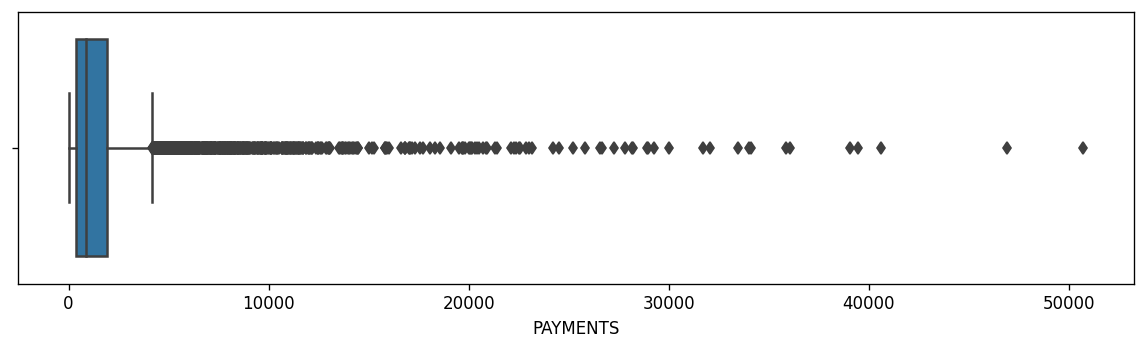

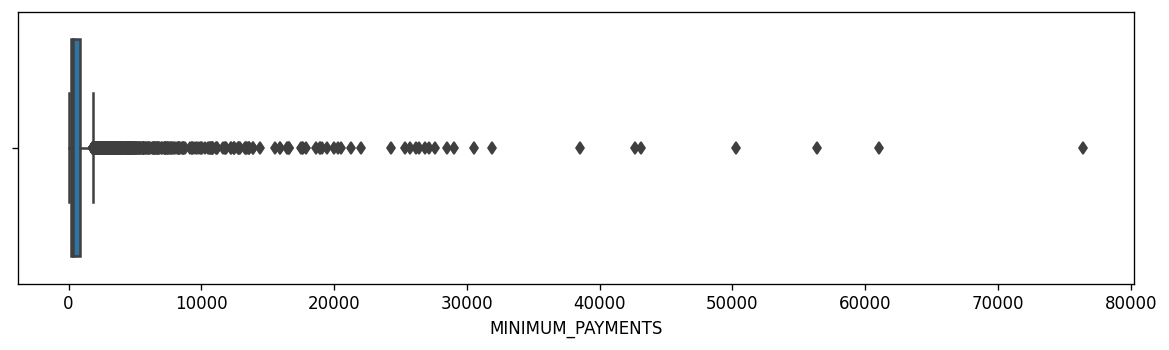

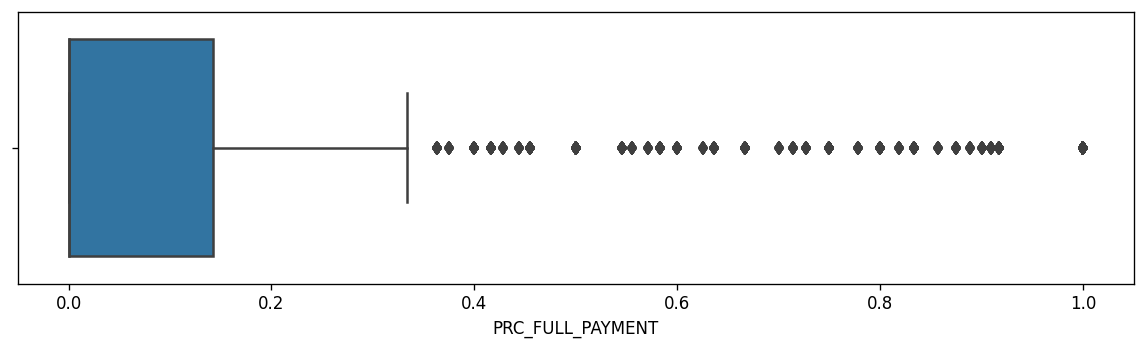

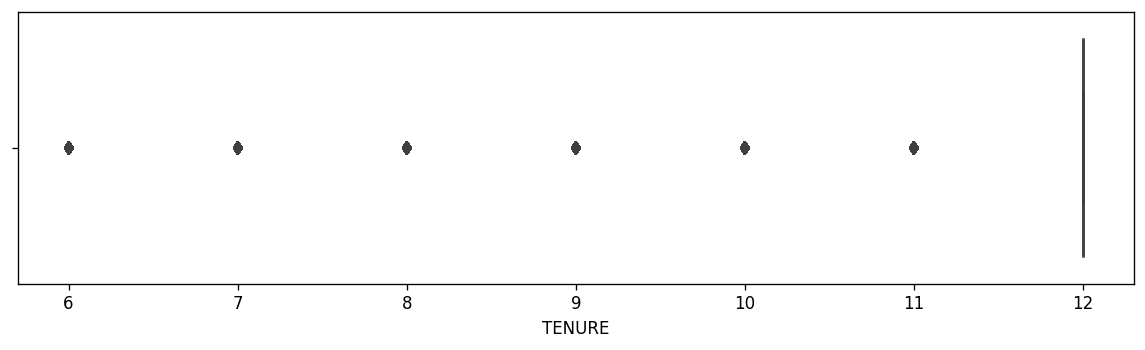

In [8]:
for i in range(len(data.columns)):
    plt.figure(figsize=(12,3),dpi=120)
    sns.boxplot(x=data.columns[i],data=data)
plt.show()

 #### Box Plots Interpretations :
* BALANCE : There might be some noises as there are outliers which have values more than 17500.

* BALANCE_FREQUENCY : There are some values equal to zero, however the distance is not significant.

* PURCHASES : Values more than 30000 are outliers, but there is one near 50000 that is suspicious to be a noise.

* ONEOFF_PURCHASES : There are some outliers more than 33000.

* INSTALLMENT_PURCHASES : A sample with a value more than 20000 might be a noise.

* CASH_ADVANCE : A value that is more than 40000 is an outlier and should be inspected.

* PURCHASES_FREQUENCY : Values in this column are distributed with balance, and no outlier is on the plot.

* ONEOFF_PURCHASES_FREQUENCY : None of the values is as far from the rest as a noise might be.

* PURCHASES_INSTALLMENT_FREQUENCY : Also in this column there is a balance in distribution of the samples, and there is not any outlier.

* CASH_ADVANCE_FREQUENCY : However the value more than 1.4 seems like an outlier, but there is a low chance of being a noise.

* CASH_ADVANCE_TRX : Most of the values in this column are near "0". So, it should be inspected in relation with other features.

* PURCHASES_TRX : Just like CASH_ADVANCE_TRX, an analysis in relation with other features is needed.

* CREDIT_LIMIT : Samples equal or above 25000 should be inspected.

* PAYMENTS : There are number of outliers with values above 45000.

* MINIMUM_PAYMENTS : Values more than 35000 should be reviewed carefully.

* PRC_FULL_PAYMENT : There is not any outlier or noise.

* TENURE : Values on this column are not continuous.

* There are four columns with discrete values, for better insight their countplot is being analysed.

* Colummns : CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, TENURE

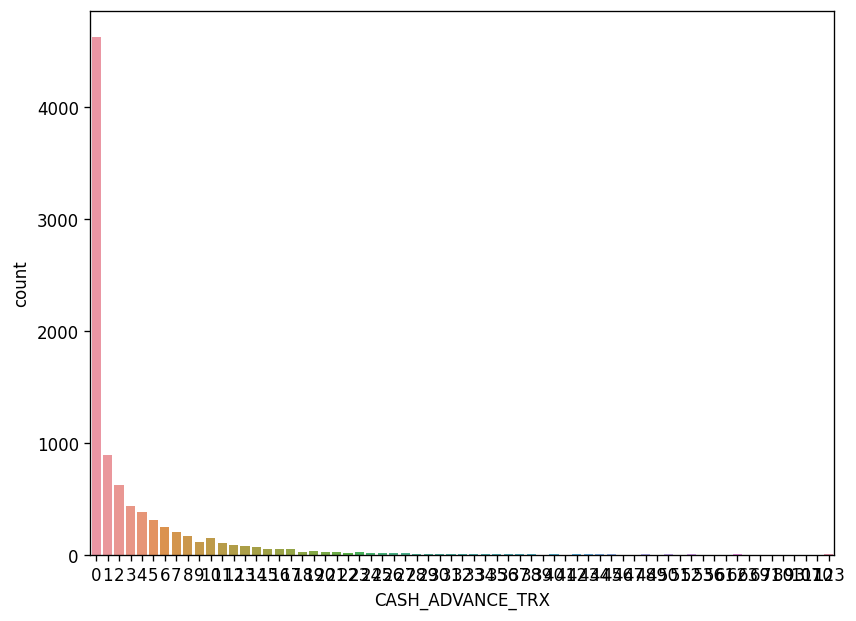

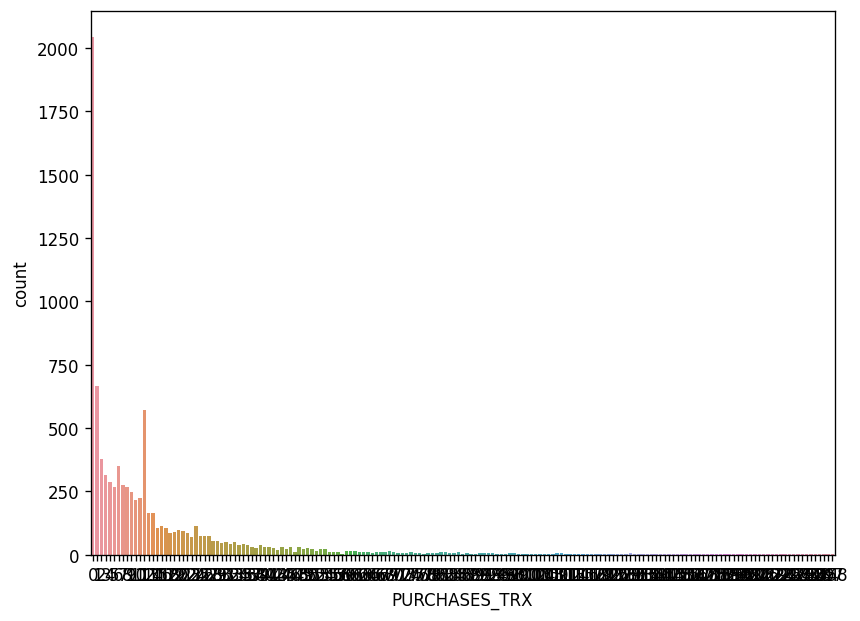

In [9]:
discrete_features=['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'TENURE']
for i in range(4):
    fig = plt.figure(figsize = (8, 6), dpi = 120)
    sns.countplot(x = discrete_features[i], data = data)
plt.show()

* Distribution of the values in the CREDIT_LIMIT column is almost normal.

* Considring that TENURE is the amount of time to repay a loan, it seems that the values in this column reflect the number of months.

#### Handling Missing Values

In [10]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

* Only 1 missing value in CREDIT_LIMIT and 313 missing values in MINIMUM_PAYMENTS

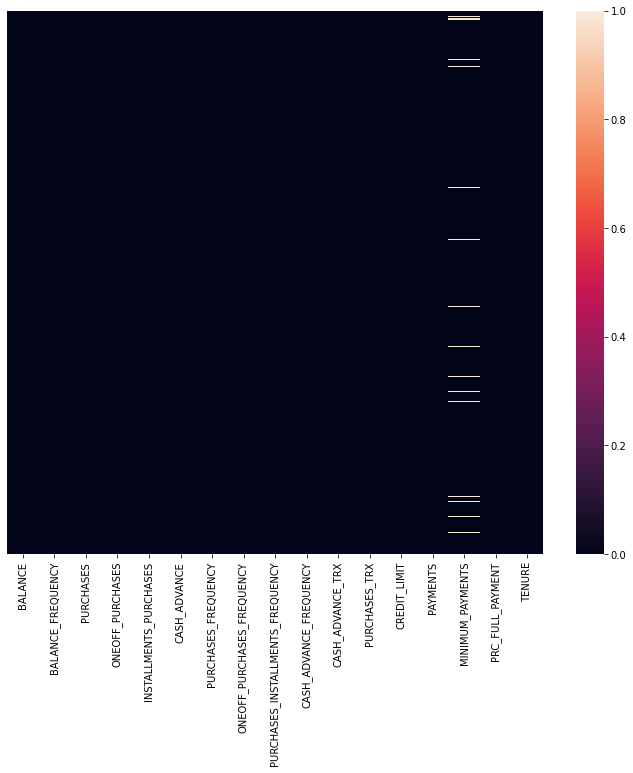

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(data.isnull(),yticklabels=False)
plt.show()

In [12]:
missing_credit=data["CREDIT_LIMIT"].isnull()
data[missing_credit]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [13]:
data = data[missing_credit == False]
data.reset_index(drop = True, inplace = True)
data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8944    28.493517           1.000000     291.12              0.00   
8945    19.183215           1.000000     300.00              0.00   
8946    23.398673           0.833333     144.40              0.00   
8947    13.457564           0.833333       0.00              0.00   
8948   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8944                  291.12      0.000000             1.000000   
8945                  300.00      0.000000             1.000000   
8946                  144.40      0.000000             0.833333   
8947                    0.00     36.558778             0.000000   
8948                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8944                    0.000000                          0.833333   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.666667   
8947                    0.000000                          0.000000   
8948                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8944                0.000000                 0              6        1000.0   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              5        1000.0   
8947                0.166667                 2              0         500.0   
8948                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8944   325.594462         48.886365          0.500000       6  
8945   275.861322               NaN          0.000000       6  
8946    81

In [14]:
missing_minimum_payment=data["MINIMUM_PAYMENTS"].isnull()
data[missing_minimum_payment].describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count   313.000000         313.000000   313.000000        313.000000   
mean    555.441321           0.389403   393.087284        250.433387   
std    1292.687887           0.408341   757.905701        624.453991   
min       0.000000           0.000000     0.000000          0.000000   
25%       0.187069           0.090909     1.400000          0.000000   
50%      16.848358           0.181818   130.400000          0.000000   
75%     286.686616           1.000000   399.950000        176.030000   
max    9164.724752           1.000000  7597.090000       6761.290000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              313.000000    313.000000           313.000000   
mean               142.653898    559.136698             0.336043   
std                311.289043   1185.132567             0.372517   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                  0.000000      0.000000             0.166667   
75%                152.280000    480.104401             0.583333   
max               2959.240000   7616.064965             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  313.000000                        313.000000   
mean                     0.107886                          0.244670   
std                      0.227370                          0.359756   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.083333                          0.416667   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              313.000000        313.000000     313.000000    313.000000   
mean                 0.067169          1.460064       5.833866   3731.789137   
std                  0.130087          3.182359       9.600908   2924.606153   
min                  0.000000          0.000000       0.000000    500.000000   
25%                  0.000000          0.000000       1.000000   1500.000000   
50%                  0.000000          0.000000       2.000000   3000.000000   
75%                  0.083333          1.000000       8.000000   5000.000000   
max                  1.000000         21.000000      77.000000  19500.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    313.000000               0.0             313.0  313.000000  
mean     322.286168               NaN               0.0   11.063898  
std     1996.658905               NaN               0.0    1.869734  
min        0.000000               NaN               0.0    6.000000  
25%        0.000000               NaN               0.0   12.000000  
50%        0.000000               NaN               0.0   12.000000  
75%        0.000000               NaN               0.0   12.000000  
max    29272.486070               NaN               0.0   12.000000

* it is seen that all the values is PRC_FULL_PAYMENT is zero

In [15]:
mask_1 = data['MINIMUM_PAYMENTS'].notnull()
mask_2 = data['PRC_FULL_PAYMENT'] == 0
len(data[mask_1][mask_2])

5589

* It can be seen that in more than 70 percent of the samples, PRC_FULL_PAYMENT is equal to zero. So, it is not anything unusual for the rows with missing values to have the same value as the afformentioned feature.

In [16]:
data["PRC_FULL_PAYMENT"].value_counts()

0.000000    5902
1.000000     488
0.083333     426
0.166667     166
0.500000     156
0.250000     156
0.090909     153
0.333333     134
0.100000      94
0.200000      83
0.666667      78
0.916667      77
0.181818      75
0.750000      68
0.833333      63
0.111111      61
0.142857      54
0.125000      52
0.416667      44
0.400000      42
0.300000      40
0.454545      36
0.272727      35
0.800000      33
0.363636      32
0.583333      31
0.600000      28
0.545455      27
0.636364      26
0.285714      24
0.727273      22
0.222222      20
0.909091      19
0.714286      19
0.777778      19
0.875000      18
0.444444      17
0.818182      17
0.900000      16
0.428571      14
0.571429      14
0.375000      13
0.857143      12
0.700000      12
0.888889      12
0.555556      12
0.625000       9
Name: PRC_FULL_PAYMENT, dtype: int64

In [17]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8949.000000        8949.000000   8949.000000       8949.000000   
mean    1564.647593           0.877350   1003.316936        592.503572   
std     2081.584016           0.236798   2136.727848       1659.968851   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.365782           0.888889     39.800000          0.000000   
50%      873.680279           1.000000    361.490000         38.000000   
75%     2054.372848           1.000000   1110.170000        577.830000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8949.000000   8949.000000          8949.000000   
mean               411.113579    978.959616             0.490405   
std                904.378205   2097.264344             0.401360   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.650000   1113.868654             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8949.000000                       8949.000000   
mean                     0.202480                          0.364478   
std                      0.298345                          0.397451   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8949.000000       8949.000000    8949.000000   8949.000000   
mean                 0.135141          3.249078      14.711476   4494.449450   
std                  0.200132          6.824987      24.858552   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8949.000000       8636.000000       8949.000000  8949.000000  
mean    1733.336511        864.304943          0.153732    11.517935  
std     2895.168146       2372.566350          0.292511     1.337134  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.282850        169.163545          0.000000    12.000000  
50%      857.062706        312.452292          0.000000    12.000000  
75%     1901.279320        825.496463          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [18]:
data.dropna().describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8636.000000        8636.000000   8636.000000       8636.000000   
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.571300           0.207697   2167.107984       1684.307803   
min        0.000000           0.000000      0.000000          0.000000   
25%      148.095189           0.909091     43.367500          0.000000   
50%      916.855459           1.000000    375.405000         44.995000   
75%     2105.195853           1.000000   1145.980000        599.100000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8636.000000   8636.000000          8636.000000   
mean               420.843533    994.175523             0.496000   
std                917.245182   2121.458303             0.401273   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 94.785000      0.000000             0.500000   
75%                484.147500   1132.385490             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8636.000000                       8636.000000   
mean                     0.205909                          0.368820   
std                      0.300054                          0.398093   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8636.000000       8636.000000    8636.000000   8636.000000   
mean                 0.137604          3.313918      15.033233   4522.091030   
std                  0.201791          6.912506      25.180468   3659.240379   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      18.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8636.000000       8636.000000       8636.000000  8636.000000  
mean    1784.478099        864.304943          0.159304    11.534391  
std     2909.810090       2372.566350          0.296271     1.310984  
min        0.049513          0.019163          0.000000     6.000000  
25%      418.559237        169.163545          0.000000    12.000000  
50%      896.675701        312.452292          0.000000    12.000000  
75%     1951.142090        825.496463          0.166667    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

comparing both tabel there is no significant change in values

In [19]:
minimum_payment=data["MINIMUM_PAYMENTS"].notnull()
data[minimum_payment]["MINIMUM_PAYMENTS"].agg(['min', 'max', 'mean', 'median', 'std', 'var']).round(3)

min             0.019
max         76406.208
mean          864.305
median        312.452
std          2372.566
var       5629071.086
Name: MINIMUM_PAYMENTS, dtype: float64

In [20]:
data.corr().loc["MINIMUM_PAYMENTS"].sort_values(ascending=False)

MINIMUM_PAYMENTS                    1.000000
BALANCE                             0.398669
CASH_ADVANCE                        0.140094
BALANCE_FREQUENCY                   0.132519
INSTALLMENTS_PURCHASES              0.132156
CREDIT_LIMIT                        0.126671
PAYMENTS                            0.126630
CASH_ADVANCE_TRX                    0.109727
CASH_ADVANCE_FREQUENCY              0.098844
PURCHASES_TRX                       0.096311
PURCHASES                           0.093842
TENURE                              0.059330
ONEOFF_PURCHASES                    0.048741
PURCHASES_INSTALLMENTS_FREQUENCY    0.030036
PURCHASES_FREQUENCY                 0.002979
ONEOFF_PURCHASES_FREQUENCY         -0.030357
PRC_FULL_PAYMENT                   -0.140404
Name: MINIMUM_PAYMENTS, dtype: float64

* Regarding the correlation coefficients of features with MINIMUM_PAYMENTS, it is not highly correlated with any of the features

In [21]:
data.dropna(inplace = True)
data.reset_index(drop = True, inplace = True)
data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3      678.334763        244.791237          0.000000      12  
4     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8631    58.644883         43.473717          0.000000       6  
8632   325.594462         48.886365          0.500000       6  
8633    81

#### Handling Outliers

#### Outliers of each feature : 
* BALANCE > 17500 
* BALANCE_FREQUENCY == 0
* PURCHASES > 30000
* ONEOFF_PURCHASES > 30000
* INSTALLMENTS_PURCHASES > 20000
* CASH_ADVANCE > 40000
* CASH_ADVANCE_FREQUENCY > 1.4
* CASH_ADVANCE_TRX > 80
* CREDIT_LIMIT >= 25000
* PAYMENTS > 45000
* MINIMUM_PAYMENTS > 35000

In [22]:
data["BALANCE"].nlargest(5)

122     19043.13856
3992    18495.55855
5309    16304.88925
6410    16259.44857
5107    16115.59640
Name: BALANCE, dtype: float64

In [23]:
plt.figure(figsize=(10,10))
data["BALANCE"].hist(bins=10)
plt.show()

In [24]:
balance=data["BALANCE"]<=17500
data[balance]["BALANCE"].describe()

count     8634.000000
mean      1597.248028
std       2079.451860
min          0.000000
25%        147.923961
50%        916.693628
75%       2100.631605
max      16304.889250
Name: BALANCE, dtype: float64

In [25]:
data["BALANCE"].describe()

count     8636.000000
mean      1601.224893
std       2095.571300
min          0.000000
25%        148.095189
50%        916.855459
75%       2105.195853
max      19043.138560
Name: BALANCE, dtype: float64

In [26]:
bal_freq=data["BALANCE_FREQUENCY"]<0.1
sum(bal_freq)

31

In [27]:
mask = data['BALANCE_FREQUENCY'] == 0
data[mask == False]['BALANCE_FREQUENCY'].describe()

count    8630.000000
mean        0.895657
std         0.206423
min         0.090909
25%         0.909091
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

In [28]:
data['BALANCE_FREQUENCY'].describe()

count    8636.000000
mean        0.895035
std         0.207697
min         0.000000
25%         0.909091
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

In [29]:
data['PURCHASES'].nlargest(5)

512     49039.57
464     41050.40
1166    40040.71
1509    38902.71
3792    35131.16
Name: PURCHASES, dtype: float64

<AxesSubplot:>

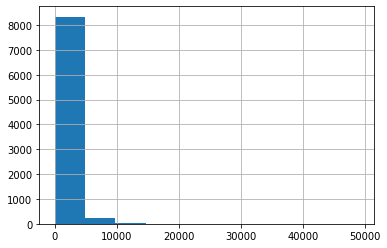

In [30]:
data['PURCHASES'].hist(bins = 10)

In [31]:
data['PURCHASES'].describe()

count     8636.000000
mean      1025.433874
std       2167.107984
min          0.000000
25%         43.367500
50%        375.405000
75%       1145.980000
max      49039.570000
Name: PURCHASES, dtype: float64

In [32]:
mask = data['PURCHASES'] > 30000
data[mask == False]['PURCHASES'].describe()

count     8629.000000
mean       995.207238
std       1883.487877
min          0.000000
25%         43.250000
50%        374.950000
75%       1141.240000
max      27957.680000
Name: PURCHASES, dtype: float64

In [33]:
data[mask]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
246    5131.319584                1.0   32539.78          26547.43   
464   13479.288210                1.0   41050.40          40624.06   
512   11547.520010                1.0   49039.57          40761.25   
1166   4010.621974                1.0   40040.71          24543.52   
1509   3391.702180                1.0   38902.71          33803.84   
1545   3454.094319                1.0   31299.35          19064.30   
3792   2997.977825                1.0   35131.16          34087.73   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
246                  5992.35      0.000000             1.000000   
464                   426.34      0.000000             0.833333   
512                  8278.32    558.166886             1.000000   
1166                15497.19      0.000000             1.000000   
1509                 5098.87      0.000000             1.000000   
1545                12235.05      0.000000             1.000000   
3792                 1043.43      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
246                     1.000000                          1.000000   
464                     0.666667                          0.416667   
512                     1.000000                          0.916667   
1166                    1.000000                          1.000000   
1509                    1.000000                          1.000000   
1545                    0.666667                          0.833333   
3792                    1.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
246                 0.000000                 0             98       11500.0   
464                 0.000000                 0            157       17000.0   
512                 0.083333                 1            101       22500.0   
1166                0.000000                 0            358       18000.0   
1509                0.000000                 0            195       18000.0   
1545                0.000000                 0            121        7500.0   
3792                0.000000                 0            344       12000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
246   26652.34432       1971.129435          0.083333      12  
464   36066.75068      15914.484620          0.083333      12  
512   46930.59824       2974.069421          0.250000      12  
1166  33994.72785        703.503256          1.000000      12  
1509  35843.62593        716.027656          1.000000      12  
1545  22542.58705       1193.031030          0.583333      12  
3792  28896.66522        767.014180          0.750000      12

In [34]:
data['ONEOFF_PURCHASES'].nlargest(8)

512     40761.25
464     40624.06
3792    34087.73
1509    33803.84
246     26547.43
6818    26514.32
1355    25122.77
1166    24543.52
Name: ONEOFF_PURCHASES, dtype: float64

<AxesSubplot:>

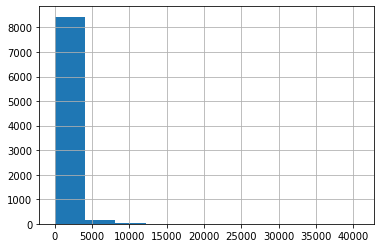

In [35]:
data['ONEOFF_PURCHASES'].hist(bins = 10)

In [36]:
mask = data['ONEOFF_PURCHASES'] > 30000
data[mask]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
464   13479.288210                1.0   41050.40          40624.06   
512   11547.520010                1.0   49039.57          40761.25   
1509   3391.702180                1.0   38902.71          33803.84   
3792   2997.977825                1.0   35131.16          34087.73   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
464                   426.34      0.000000             0.833333   
512                  8278.32    558.166886             1.000000   
1509                 5098.87      0.000000             1.000000   
3792                 1043.43      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
464                     0.666667                          0.416667   
512                     1.000000                          0.916667   
1509                    1.000000                          1.000000   
3792                    1.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
464                 0.000000                 0            157       17000.0   
512                 0.083333                 1            101       22500.0   
1509                0.000000                 0            195       18000.0   
3792                0.000000                 0            344       12000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
464   36066.75068      15914.484620          0.083333      12  
512   46930.59824       2974.069421          0.250000      12  
1509  35843.62593        716.027656          1.000000      12  
3792  28896.66522        767.014180          0.750000      12

In [37]:
data['ONEOFF_PURCHASES'].describe()

count     8636.000000
mean       604.901438
std       1684.307803
min          0.000000
25%          0.000000
50%         44.995000
75%        599.100000
max      40761.250000
Name: ONEOFF_PURCHASES, dtype: float64

In [38]:
data[mask == False]['ONEOFF_PURCHASES'].describe()

count     8632.000000
mean       587.888316
std       1485.914085
min          0.000000
25%          0.000000
50%         44.850000
75%        598.037500
max      26547.430000
Name: ONEOFF_PURCHASES, dtype: float64

In [39]:
data['INSTALLMENTS_PURCHASES'].nlargest(5)

5086    22500.00
1166    15497.19
3059    14686.10
3564    13184.43
2707    12738.47
Name: INSTALLMENTS_PURCHASES, dtype: float64

<AxesSubplot:>

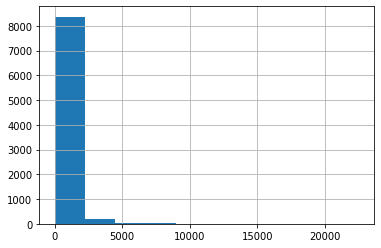

In [40]:
data['INSTALLMENTS_PURCHASES'].hist(bins = 10)

In [41]:
data['INSTALLMENTS_PURCHASES'].describe()

count     8636.000000
mean       420.843533
std        917.245182
min          0.000000
25%          0.000000
50%         94.785000
75%        484.147500
max      22500.000000
Name: INSTALLMENTS_PURCHASES, dtype: float64

In [42]:
mask = data['INSTALLMENTS_PURCHASES'] < 20000
data[mask]['INSTALLMENTS_PURCHASES'].describe()

count     8635.000000
mean       418.286595
std        885.984236
min          0.000000
25%          0.000000
50%         94.710000
75%        483.680000
max      15497.190000
Name: INSTALLMENTS_PURCHASES, dtype: float64

In [43]:
data.sort_values(by = 'INSTALLMENTS_PURCHASES', ascending = False).head(1)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5086  4060.710208           0.727273    22500.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5086                 22500.0           0.0                  0.5   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5086                         0.0                          0.416667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5086                     0.0                 0             12       23000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5086  8760.860264       1645.535202               0.0      12

In [44]:
data['CASH_ADVANCE'].nlargest(5)

2054    47137.21176
977     29282.10915
64      27296.48576
7022    26268.69989
7402    26194.04954
Name: CASH_ADVANCE, dtype: float64

<AxesSubplot:>

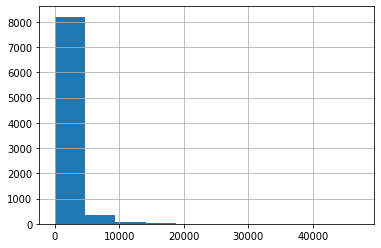

In [45]:
data['CASH_ADVANCE'].hist(bins = 10)

In [46]:
data['CASH_ADVANCE'].describe()

count     8636.000000
mean       994.175523
std       2121.458303
min          0.000000
25%          0.000000
50%          0.000000
75%       1132.385490
max      47137.211760
Name: CASH_ADVANCE, dtype: float64

In [47]:
mask = data['CASH_ADVANCE'] < 45000
data[mask]['CASH_ADVANCE'].describe()

count     8635.000000
mean       988.831801
std       2062.637616
min          0.000000
25%          0.000000
50%          0.000000
75%       1131.895249
max      29282.109150
Name: CASH_ADVANCE, dtype: float64

In [48]:
data['CASH_ADVANCE_FREQUENCY'].nlargest(5)

2919    1.500000
640     1.250000
1530    1.166667
3129    1.166667
8086    1.142857
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

<AxesSubplot:>

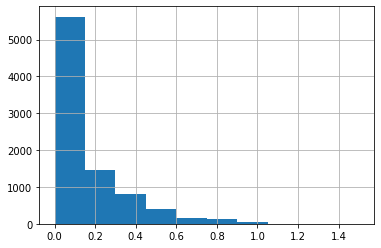

In [49]:
data['CASH_ADVANCE_FREQUENCY'].hist(bins = 10)

In [50]:
data['CASH_ADVANCE_FREQUENCY'].describe()

count    8636.000000
mean        0.137604
std         0.201791
min         0.000000
25%         0.000000
50%         0.000000
75%         0.250000
max         1.500000
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

In [51]:
data['CASH_ADVANCE_TRX'].nlargest(10)

504     123
2054    123
8039    123
3417    110
1812    107
5113     93
5145     80
4951     71
7402     69
3137     63
Name: CASH_ADVANCE_TRX, dtype: int64

In [52]:
data['CASH_ADVANCE_TRX'].hist(bins = 10)

<AxesSubplot:>

In [53]:
data['CASH_ADVANCE_TRX'].describe()

count    8636.000000
mean        3.313918
std         6.912506
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       123.000000
Name: CASH_ADVANCE_TRX, dtype: float64

In [54]:
mask = data['CASH_ADVANCE_TRX'] <= 80
data[mask]['CASH_ADVANCE_TRX'].describe()

count    8630.000000
mean        3.237543
std         6.271590
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max        80.000000
Name: CASH_ADVANCE_TRX, dtype: float64

In [55]:
data['CREDIT_LIMIT'].nlargest(10)

4747    30000.0
6818    30000.0
900     28000.0
3527    25000.0
176     23000.0
5086    23000.0
512     22500.0
3992    22000.0
126     21500.0
1422    21500.0
Name: CREDIT_LIMIT, dtype: float64

In [56]:
data['PAYMENTS'].nlargest(5)

4072    50721.48336
512     46930.59824
4514    40627.59524
5183    39461.96580
2054    39048.59762
Name: PAYMENTS, dtype: float64

<AxesSubplot:>

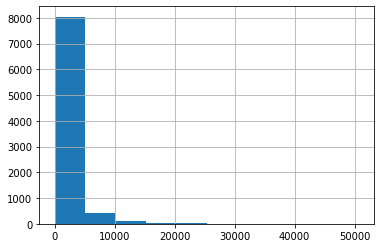

In [57]:
data['PAYMENTS'].hist(bins = 10)

In [58]:
data['PAYMENTS'].describe()

count     8636.000000
mean      1784.478099
std       2909.810090
min          0.049513
25%        418.559237
50%        896.675701
75%       1951.142090
max      50721.483360
Name: PAYMENTS, dtype: float64

In [59]:
mask = data['PAYMENTS'] < 45000
data[mask]['PAYMENTS'].describe()

count     8634.000000
mean      1773.581281
std       2820.521674
min          0.049513
25%        418.484380
50%        895.707030
75%       1947.827567
max      40627.595240
Name: PAYMENTS, dtype: float64

In [60]:
data['MINIMUM_PAYMENTS'].nlargest(10)

4226    76406.20752
6902    61031.61860
5474    56370.04117
4311    50260.75947
5640    43132.72823
5775    42629.55117
529     38512.12477
5124    31871.36379
1045    30528.43240
6416    29019.80288
Name: MINIMUM_PAYMENTS, dtype: float64

In [61]:
data['MINIMUM_PAYMENTS'].hist(bins = 10)

<AxesSubplot:>

In [62]:
data['MINIMUM_PAYMENTS'].describe()

count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [63]:
mask = data['MINIMUM_PAYMENTS'] > 35000
data[mask == False]['MINIMUM_PAYMENTS'].describe()

count     8629.000000
mean       822.319441
std       1826.881731
min          0.019163
25%        169.079690
50%        311.963409
75%        819.267218
max      31871.363790
Name: MINIMUM_PAYMENTS, dtype: float64

In [64]:
data[mask]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
529    3457.086184                1.0    2448.60               0.0   
4226  10571.411070                1.0    7739.48               0.0   
4311   4976.028578                1.0     900.87               0.0   
5474   4628.109931                1.0     912.54               0.0   
5640   8038.893195                1.0       0.00               0.0   
5775   6022.224462                1.0       0.00               0.0   
6902   9024.812044                1.0       0.00               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
529                  2448.60      0.000000                  1.0   
4226                 7739.48      0.000000                  1.0   
4311                  900.87      0.000000                  1.0   
5474                  912.54      0.000000                  1.0   
5640                    0.00    197.915586                  0.0   
5775                    0.00   4111.465632                  0.0   
6902                    0.00   2750.442399                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
529                          0.0                               1.0   
4226                         0.0                               1.0   
4311                         0.0                               1.0   
5474                         0.0                               1.0   
5640                         0.0                               0.0   
5775                         0.0                               0.0   
6902                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
529                 0.000000                 0             12        1700.0   
4226                0.000000                 0             44        8000.0   
4311                0.000000                 0            162        5500.0   
5474                0.000000                 0             21        5000.0   
5640                0.166667                 8              0        9000.0   
5775                0.166667                 6              0        7000.0   
6902                0.083333                 2              0        9000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
529    227.514473       38512.12477               0.0      12  
4226  2688.447014       76406.20752               0.0      12  
4311    92.865469       50260.75947               0.0      12  
5474  3746.305759       56370.04117               0.0      12  
5640  3569.182969       43132.72823               0.0      12  
5775  4560.775720       42629.55117               0.0      12  
6902   302.484224       61031.61860               0.0      12

In [65]:
mask = data['MINIMUM_PAYMENTS'] > 50000
data[mask == False]['MINIMUM_PAYMENTS'].describe()

count     8632.000000
mean       836.430591
std       1977.534021
min          0.019163
25%        169.112703
50%        312.096808
75%        821.776198
max      43132.728230
Name: MINIMUM_PAYMENTS, dtype: float64

* MINIMUM_PAYMENTS: Excluding the outliers in this column, lower the mean value and std but not considerably. However, due the distance of the sample with its neighbors, removing them may be the better approach. (index = 4226, 6902, 5474, 4311)

* Now that we have the potential noises, in the modeling section they will be excluded from the data and wil be kept in a seperate dataframe. Reason behind this is that in case of using density based clustering method, which are robust to outliers, they do not need to be excluded and can be go through modeling process just like other samples. As a result, these samples will just be excluded for some of the algorithms and not all of them.

* Indices : 246, 464, 512, 1166, 1509, 1545, 3792, 3792, 5086, 2054, 504, 8039, 3417, 1812, 5113, 4072, 4226, 6902, 5474, 4311

* It should be noted that, during the modeling process, some of the data might be recognized as noises specially with Kmeans algorithm. So more data might be excluded in the next sections.

In [66]:
df_1 = data.drop([246, 464, 512, 1166, 1509, 1545, 3792, 3792, 5086, 2054, 504, 8039, 3417, 1812, 5113,
                  4072, 4226, 6902, 5474, 4311])
df_1.reset_index(drop = True, inplace = True)
df_1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8612     5.871712           0.500000      20.90             20.90   
8613    28.493517           1.000000     291.12              0.00   
8614    23.398673           0.833333     144.40              0.00   
8615    13.457564           0.833333       0.00              0.00   
8616   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8612                    0.00      0.000000             0.166667   
8613                  291.12      0.000000             1.000000   
8614                  144.40      0.000000             0.833333   
8615                    0.00     36.558778             0.000000   
8616                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8612                    0.166667                          0.000000   
8613                    0.000000                          0.833333   
8614                    0.000000                          0.666667   
8615                    0.000000                          0.000000   
8616                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8612                0.000000                 0              1         500.0   
8613                0.000000                 0              6        1000.0   
8614                0.000000                 0              5        1000.0   
8615                0.166667                 2              0         500.0   
8616                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3      678.334763        244.791237          0.000000      12  
4     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8612    58.644883         43.473717          0.000000       6  
8613   325.594462         48.886365          0.500000       6  
8614    81

### Visual Analysis

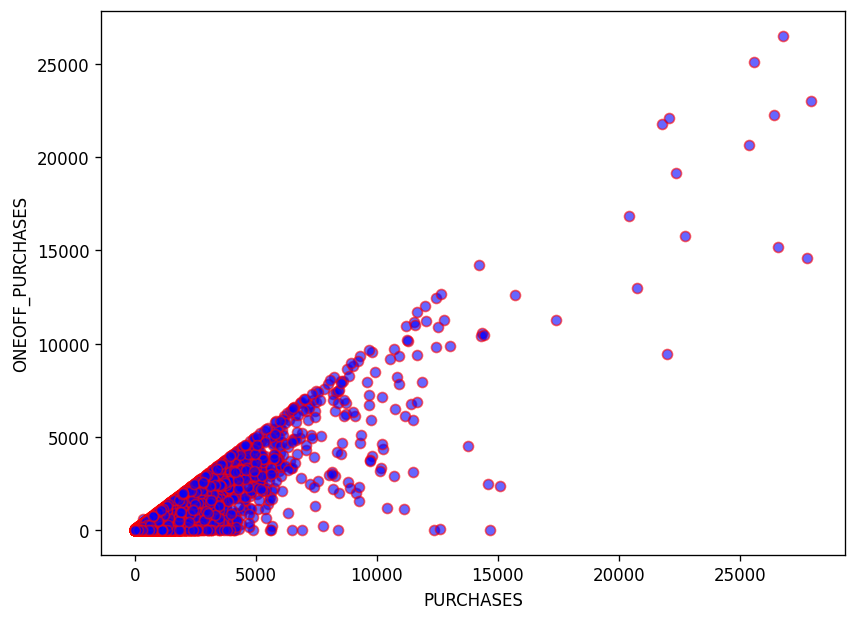

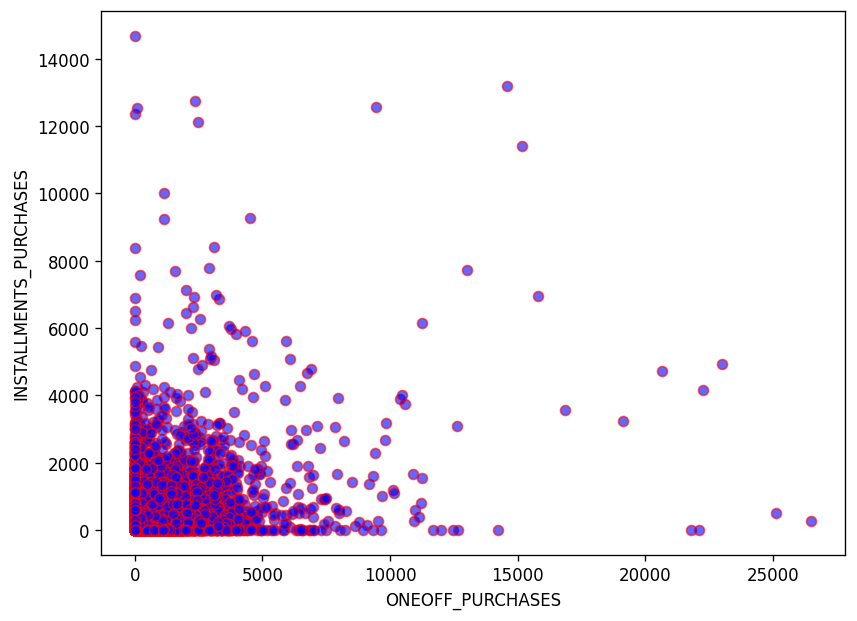

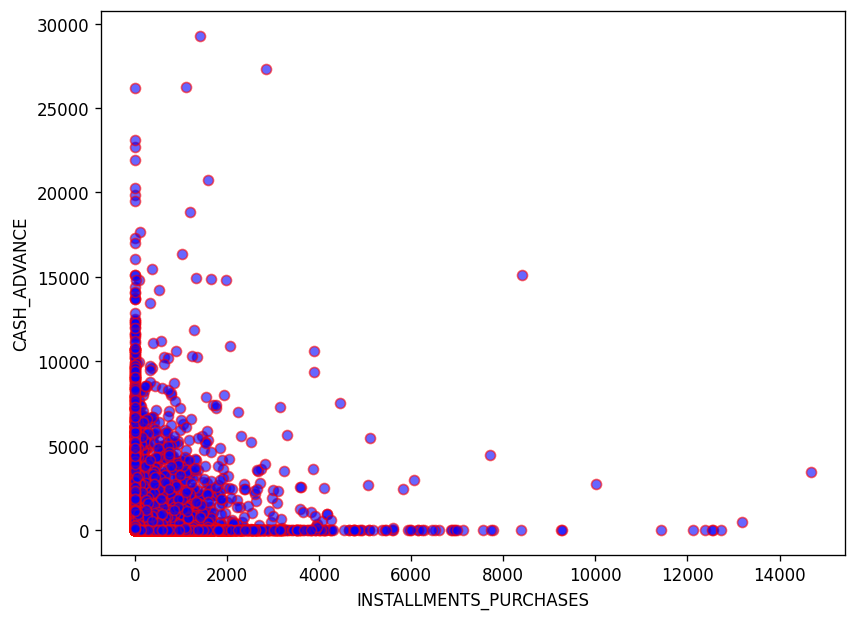

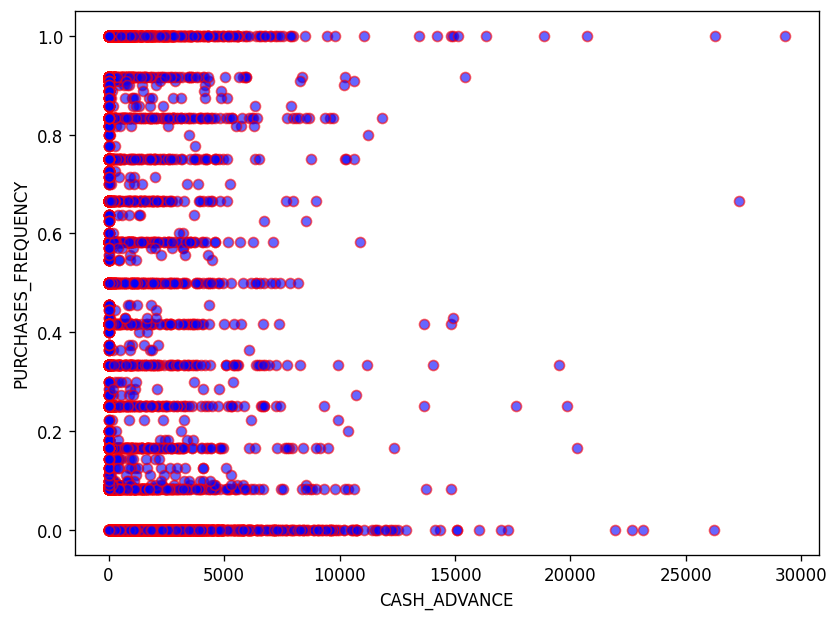

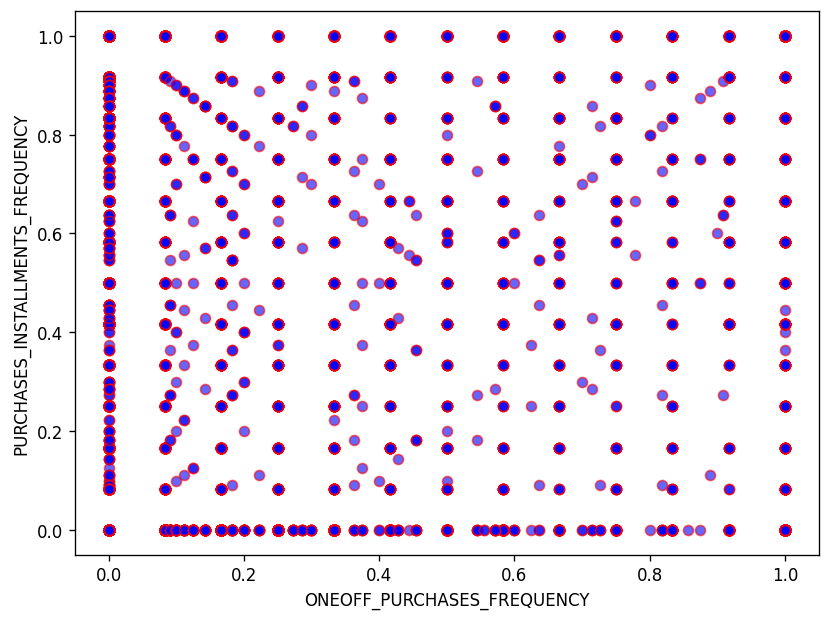

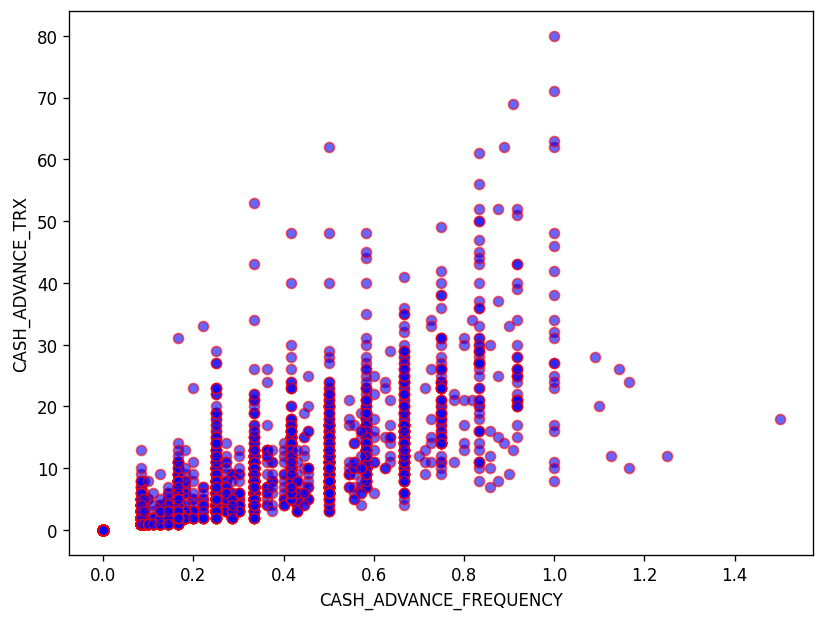

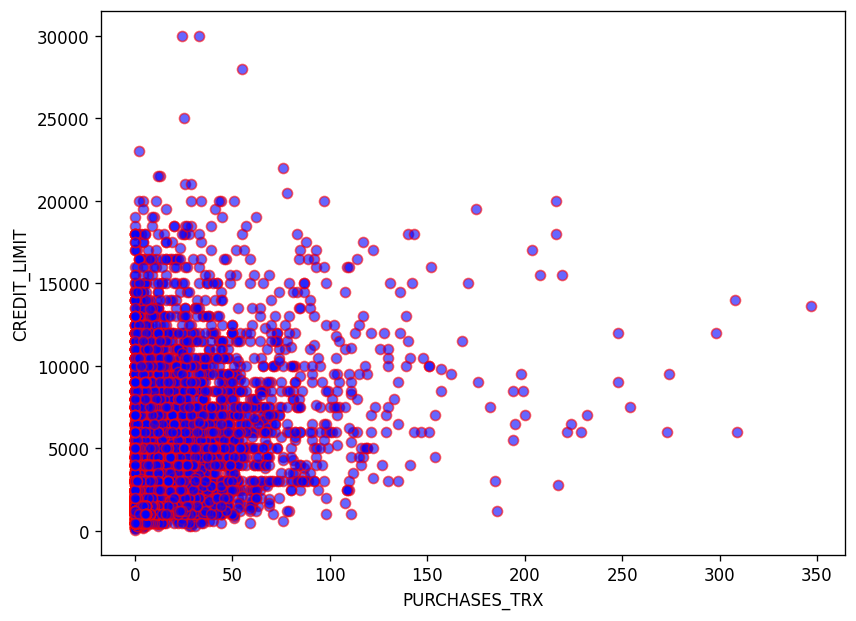

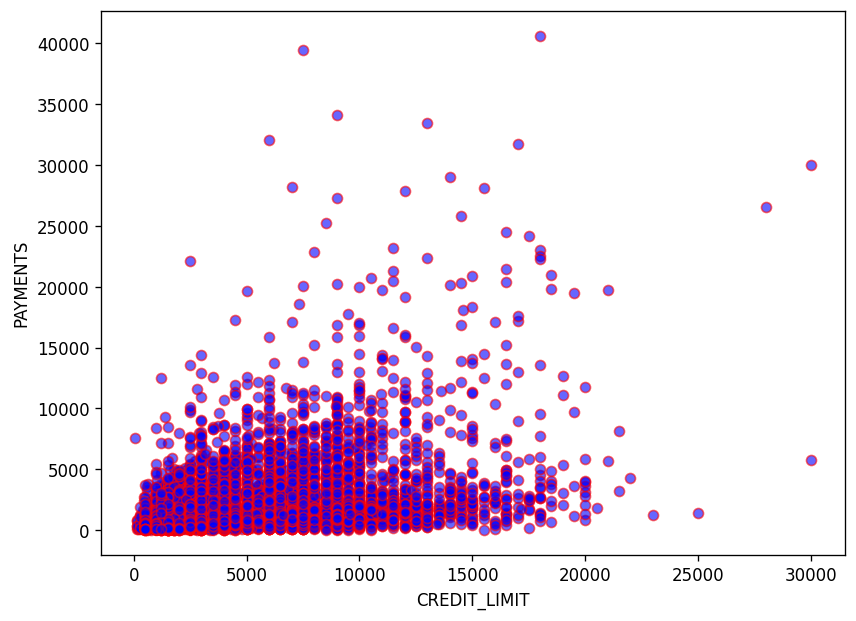

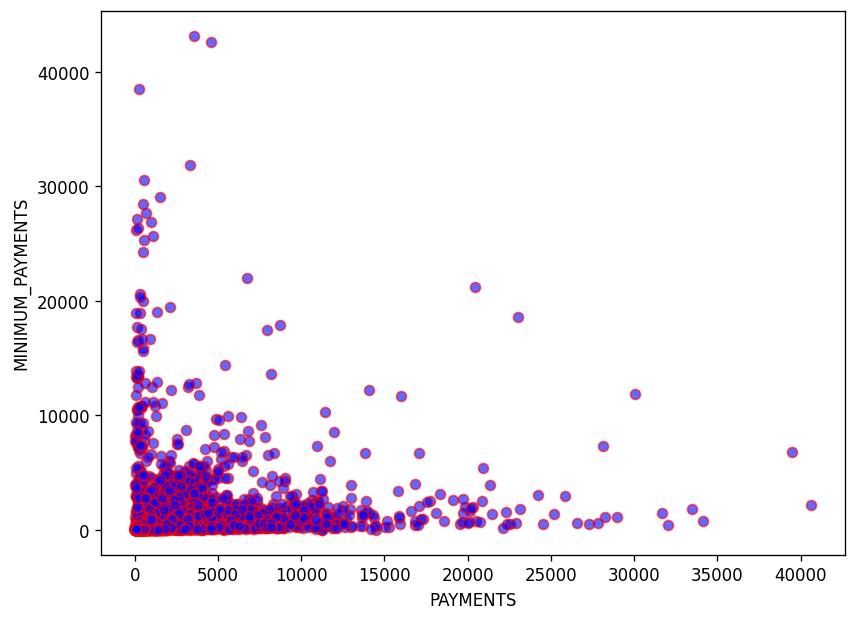

In [72]:
for i in range(16):
        x, y = i, i+1
        feature_1, feature_2 = data.columns[x], data.columns[y]
        plt.figure(figsize = (8, 6), dpi = 120)
        plt.scatter(df_1[feature_1], df_1[feature_2], color = 'blue', edgecolors = 'red', alpha = 0.6)
        plt.xlabel(feature_1)
        plt.ylabel(feature_2)

* Analyzing scatter plots has shown that the data still cotains some outliers in 2D space.

* Remining outliers :

* Largest value of BALANCE
* BALANCE > 10000, PURCHASES_TRX > 250
* PURCHASES > 20000, CASH_ADVANCE > 18000
* PURCHASES > 20000, CASH_ADVANCE_TRX > 30
* PURCHASES > 25000, CREDIT_LIMIT > 25000
* PURCHASES > 20000, PAYMENTS > 35000
* ONEOFF_PURCHASES > 20000, CASH_ADVANCE_FREQUENCY > 0.6
* ONEOFF_PURCHASES > 25000, CREDIT_LIMIT > 25000
* INSTALLMENTS_PURCHASES > 8000, CASH_ADVANCE > 14500
* INSTALLMENTS_PURCHASES > 12000, PURCHASES_FREQUENCY < 0.4
* INSTALLMENTS_PURCHASES > 12000, PURCHASES_INSTALLMENTS_FREQUENCY < 0.2
* CASH_ADVANCE > 25000, 0.6 < PURCHASES_FREQUENCY < 0.8
* CASH_ADVANCE > 14000, PURCHASES_TRX > 300
* PURCHASES_FREQUENCY < 0.4, PURCHASES_TRX > 150
* PURCHASES_FREQUENCY < 0.8, PURCHASES_TRX > 300
* largest value of CASH_ADVANCE_FREQUENCY
* CASH_ADVANCE_TRX > 40, PURCHASES_TRX > 300

* Indices of the outliers : 122, 2698, 3050, 5167, 896, 6801, 4350, 1605, 64, 7467, 4614, 2910

In [88]:
df_2 = df_1.drop([122, 2698, 3050, 5167, 896, 6801, 4350, 1605, 64, 7467, 4614, 2910])
df_2.reset_index(drop = True, inplace = True)
df_2

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8600     5.871712           0.500000      20.90             20.90   
8601    28.493517           1.000000     291.12              0.00   
8602    23.398673           0.833333     144.40              0.00   
8603    13.457564           0.833333       0.00              0.00   
8604   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8600                    0.00      0.000000             0.166667   
8601                  291.12      0.000000             1.000000   
8602                  144.40      0.000000             0.833333   
8603                    0.00     36.558778             0.000000   
8604                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8600                    0.166667                          0.000000   
8601                    0.000000                          0.833333   
8602                    0.000000                          0.666667   
8603                    0.000000                          0.000000   
8604                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8600                0.000000                 0              1         500.0   
8601                0.000000                 0              6        1000.0   
8602                0.000000                 0              5        1000.0   
8603                0.166667                 2              0         500.0   
8604                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3      678.334763        244.791237          0.000000      12  
4     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8600    58.644883         43.473717          0.000000       6  
8601   325.594462         48.886365          0.500000       6  
8602    81

* Now for clustering we have 3 dataframes. One is data with all the samples, the other one is df_1 without outliers in each column, and the last one is df_2 without outliers in 2D space

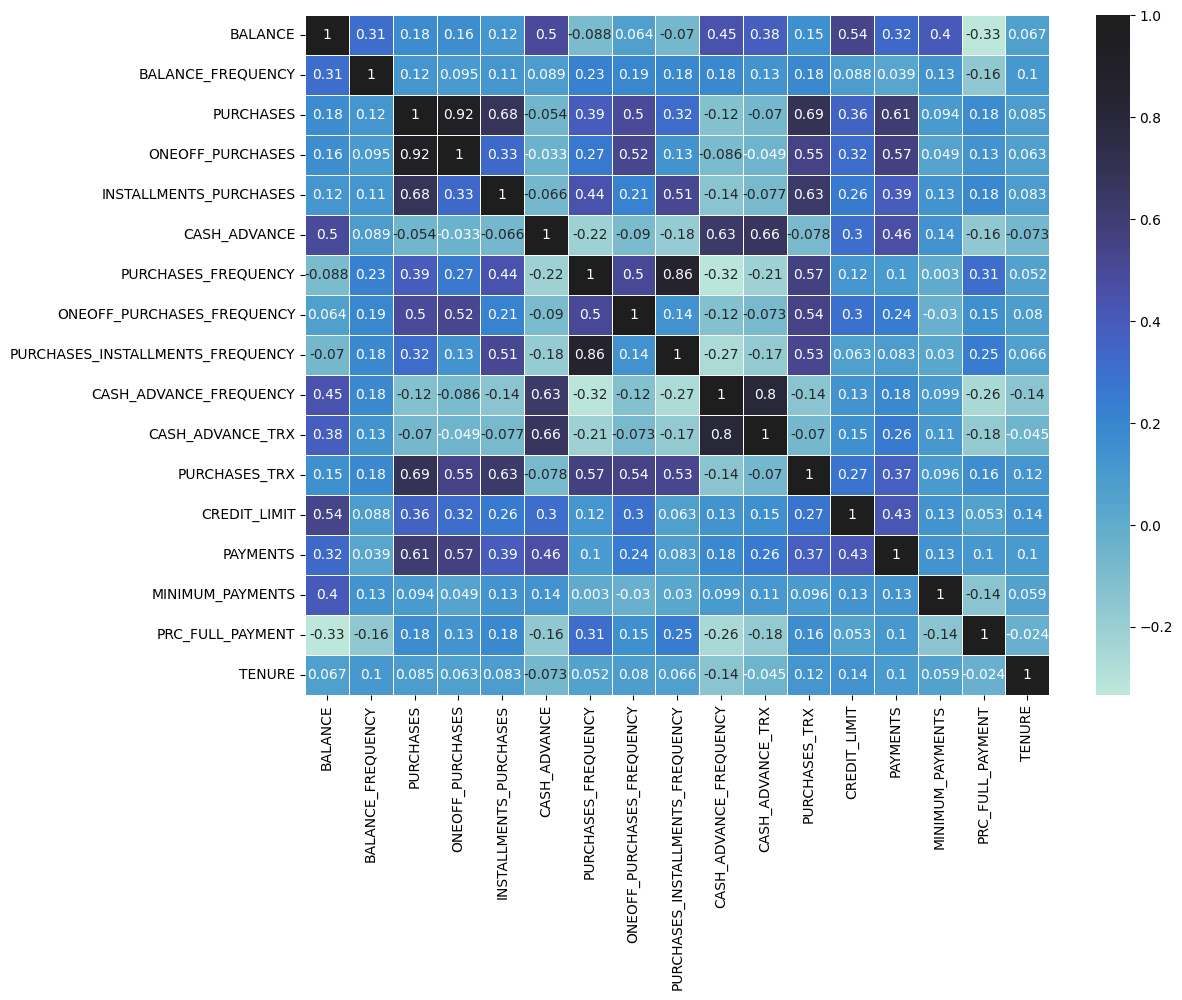

In [73]:
fig, ax = plt.subplots(figsize = (12, 9), dpi = 100)
sns.heatmap(data.corr(), center = 1, cbar = True, annot = True, linewidths = 0.5, ax = ax)
plt.show()

## Clustering

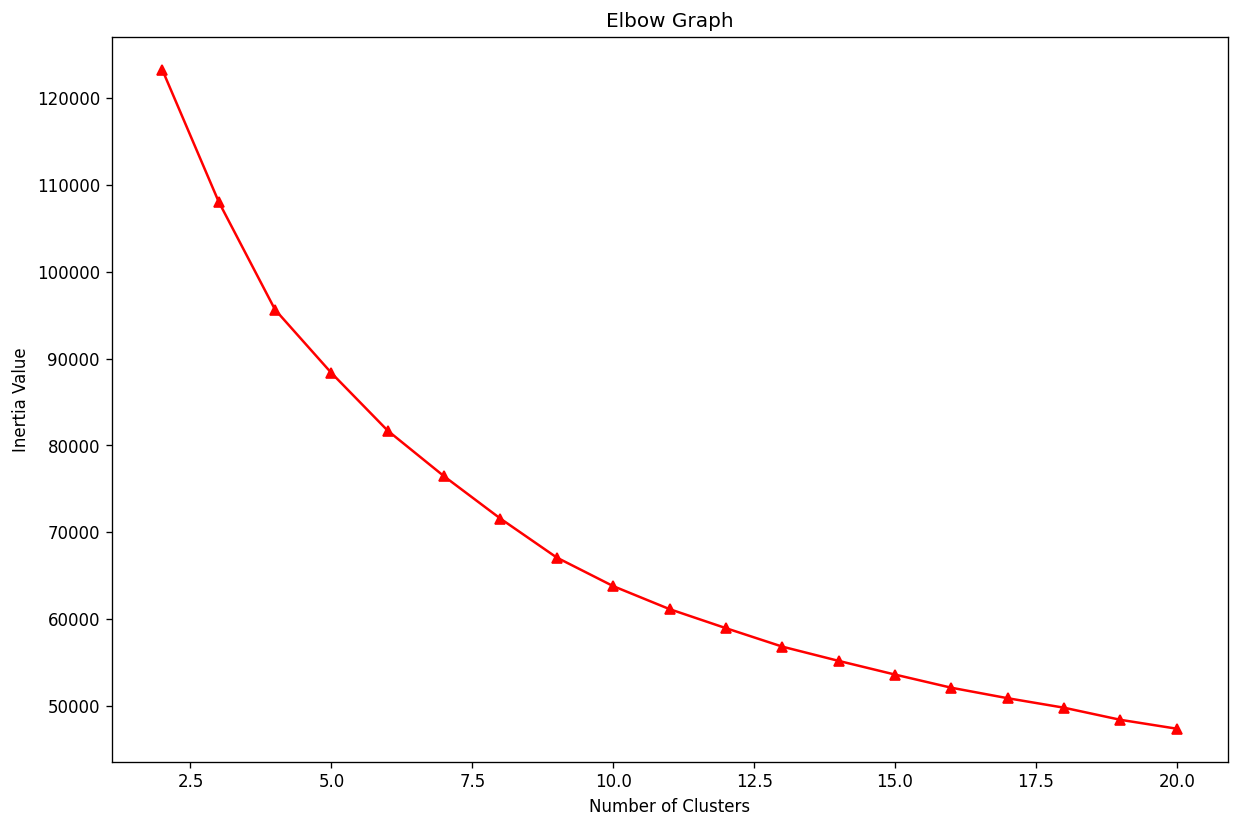

In [74]:
kmeans_constants = {'n_init' : 100, 'random_state' : 1}

inertia_values = []

for k in range(2, 21):
    scaler = StandardScaler()
    X = scaler.fit_transform(data)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(X)
    inertia_values.append(model.inertia_)

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()


In [75]:
from kneed import KneeLocator
kl = KneeLocator(range(2, 21), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

9

Elbow graph shows that 9 clusters is the best choice for this dataset.

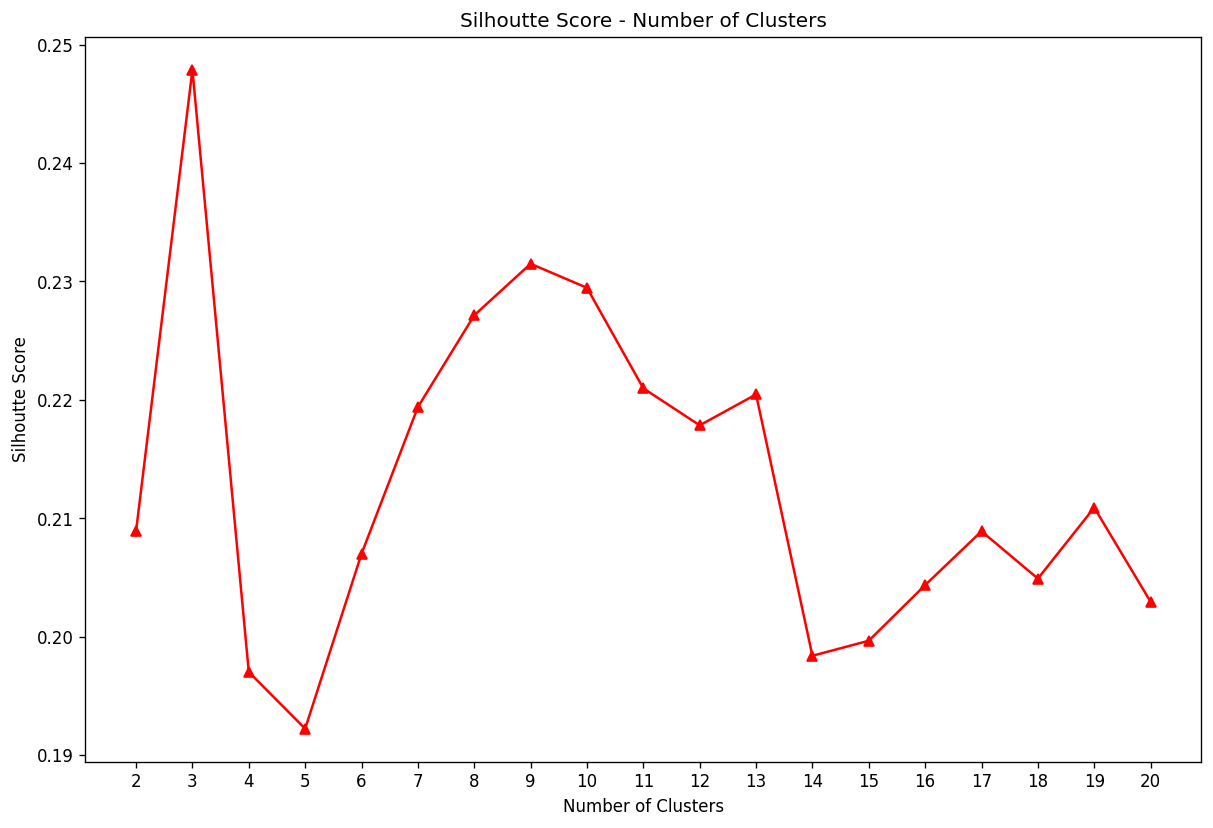

In [79]:
silhoutte_coefs = []

for k in range(2, 21):
    scaler = StandardScaler()
    X = scaler.fit_transform(data)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(X)
    silhoutte_coefs.append(metrics.silhouette_score(X, model.labels_))

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Number of Clusters')
plt.xticks(range(2,21))
plt.show()

*  Based on the silhouette scores, 3 clusters is the best choice. Considering that silhouette score is a better indicator than elbow graph, we will continue with 3 clusters.

In [80]:
scaler = StandardScaler()
X = scaler.fit_transform(data)
model = KMeans(n_clusters = 3, **kmeans_constants)
model.fit(X)

KMeans(n_clusters=3, n_init=100, random_state=1)

In [81]:
centroids = scaler.inverse_transform(model.cluster_centers_)
centroids = pd.DataFrame(centroids, columns = data.columns)

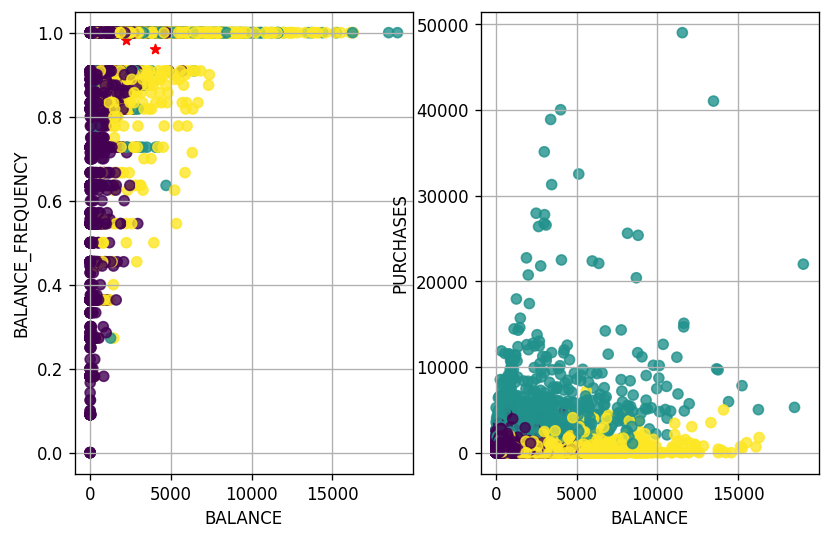

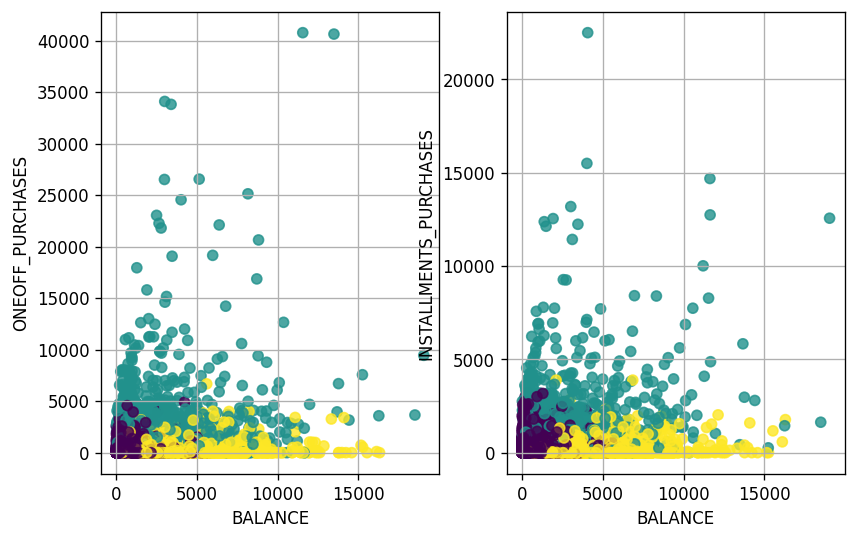

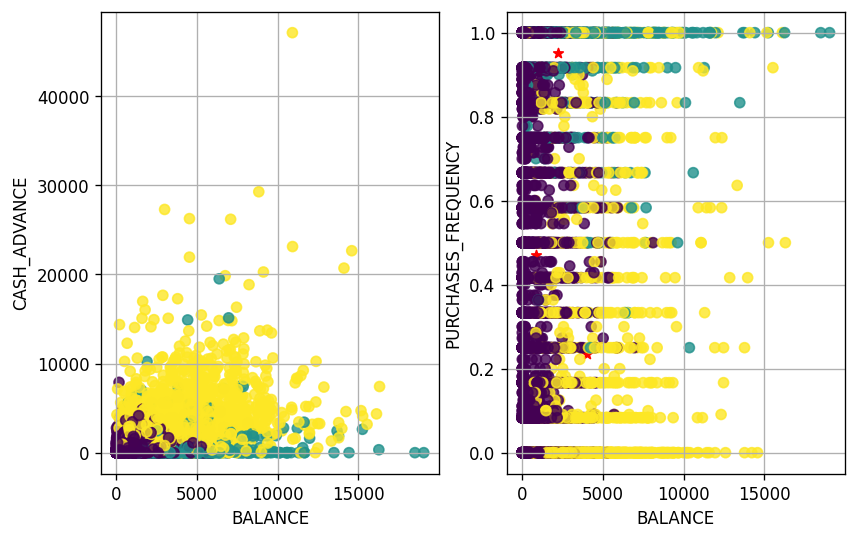

In [82]:
plt.style.use('default')
i = 1
while i < len(data.columns):
    try:
        fig = plt.figure(figsize = (8, 5), dpi = 120)
        plt.subplot(1,2,1)
        plt.scatter(centroids['BALANCE'], centroids[data.columns[i]], marker = '*', c = 'r')
        plt.scatter(data['BALANCE'], data[data.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(data.columns[i])
        plt.grid()
        i += 1
        plt.subplot(1,2,2)
        plt.scatter(centroids['BALANCE'], centroids[data.columns[i]], marker = '*', c = 'r')
        plt.scatter(data['BALANCE'], data[data.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(data.columns[i])
        plt.grid()
        i += 1
    except IndexError:
        break
plt.show()

In [83]:
print('Inertia : ', model.inertia_)
print('Silhouette Score : ', metrics.silhouette_score(X, model.labels_))

Inertia :  108086.19316841771
Silhouette Score :  0.24786629890647918


In [84]:
inertia_values = []

for k in range(2, 21):
    scaler = StandardScaler()
    X = scaler.fit_transform(df_1)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(X)
    inertia_values.append(model.inertia_)
    
plt.style.use('seaborn')
plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

In [86]:
kl = KneeLocator(range(2, 21), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

8

Elbow method gives slight different result

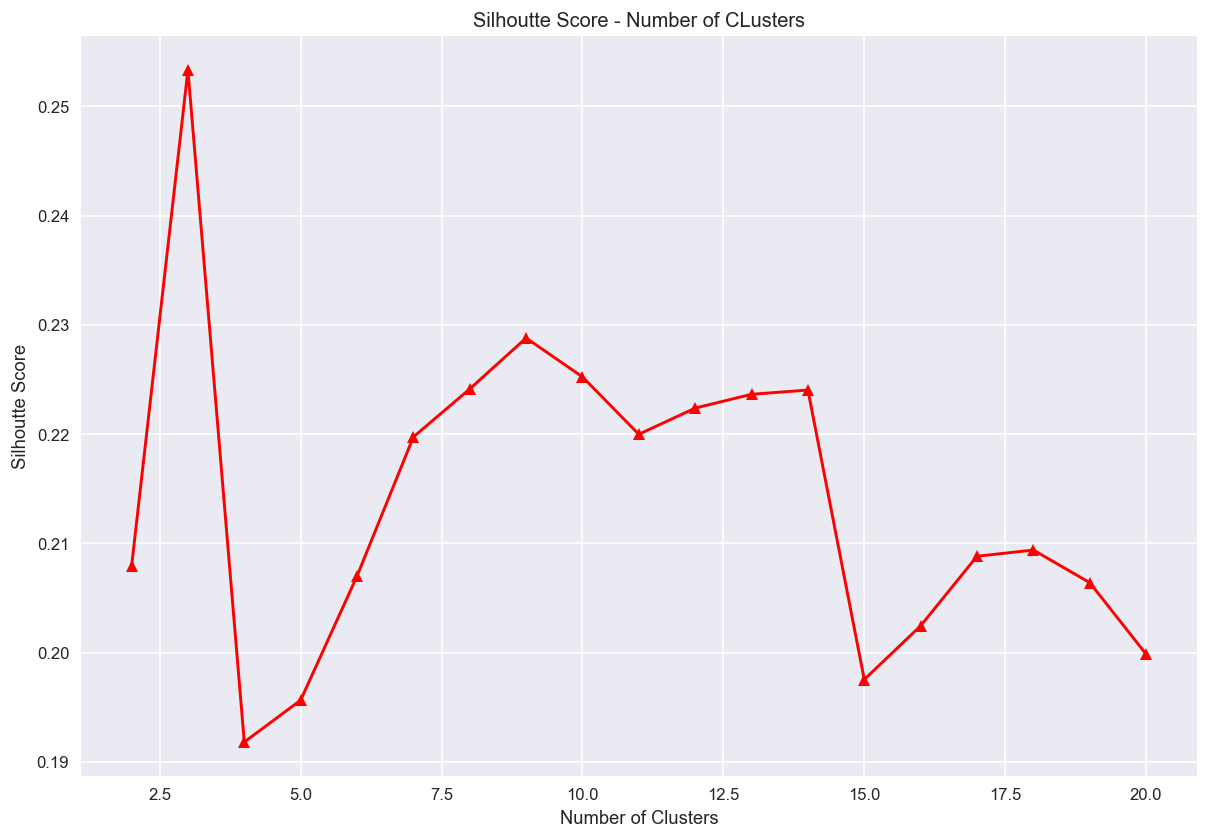

In [87]:
silhoutte_coefs = []

for k in range(2, 21):
    scaler = StandardScaler()
    X = scaler.fit_transform(df_1)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(X)
    silhoutte_coefs.append(metrics.silhouette_score(X, model.labels_))
    
plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Number of CLusters')
plt.show()

In [89]:
scaler = StandardScaler()
X = scaler.fit_transform(df_1)
model = KMeans(n_clusters = 3, **kmeans_constants)
model.fit(X)

KMeans(n_clusters=3, n_init=100, random_state=1)

In [90]:
centroids = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_), columns = df_1.columns)

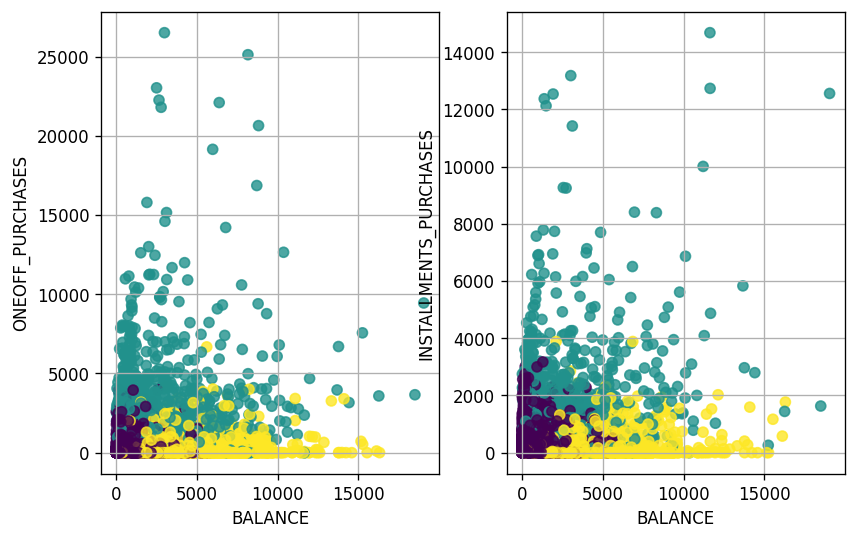

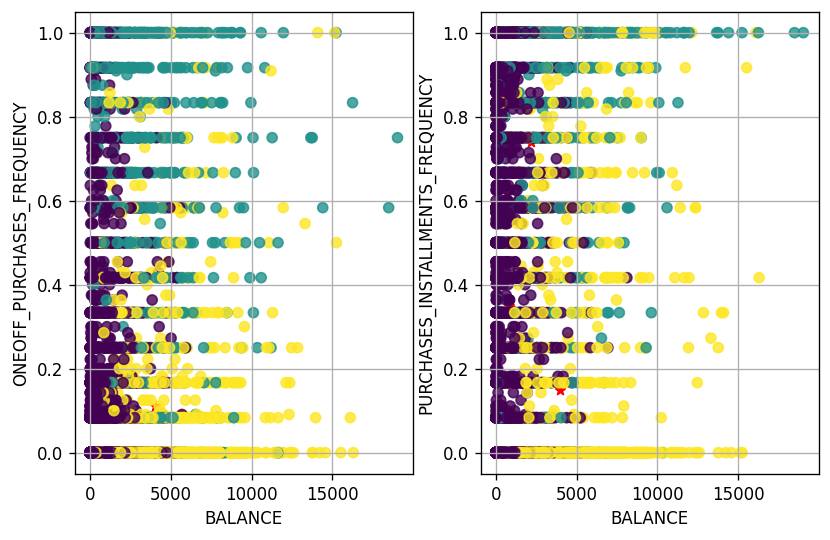

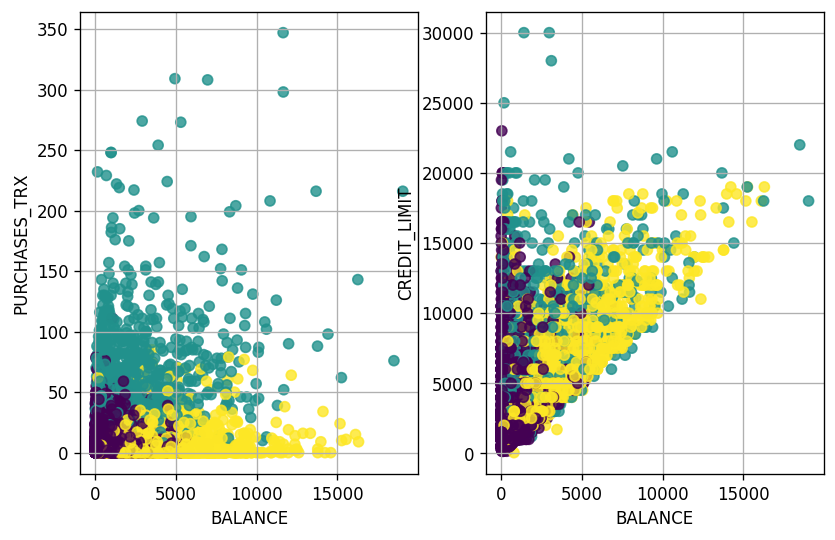

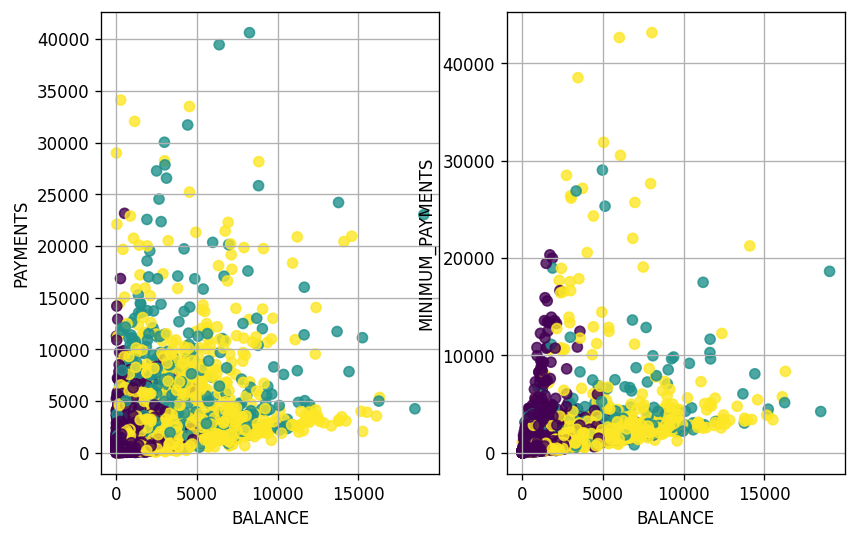

In [91]:
plt.style.use('default')
i = 1
while i < len(data.columns):
    try:
        fig = plt.figure(figsize = (8, 5), dpi = 120)
        plt.subplot(1,2,1)
        plt.scatter(centroids['BALANCE'], centroids[data.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_1['BALANCE'], df_1[data.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(data.columns[i])
        plt.grid()
        i += 1
        plt.subplot(1,2,2)
        plt.scatter(centroids['BALANCE'], centroids[data.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_1['BALANCE'], df_1[data.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(data.columns[i])
        plt.grid()
        i += 1
    except IndexError:
        break
plt.show()

In [92]:
print('Inertia : ', model.inertia_)
print('Silhouette Score : ', metrics.silhouette_score(X, model.labels_))

Inertia :  105691.40335848126
Silhouette Score :  0.253316455199832


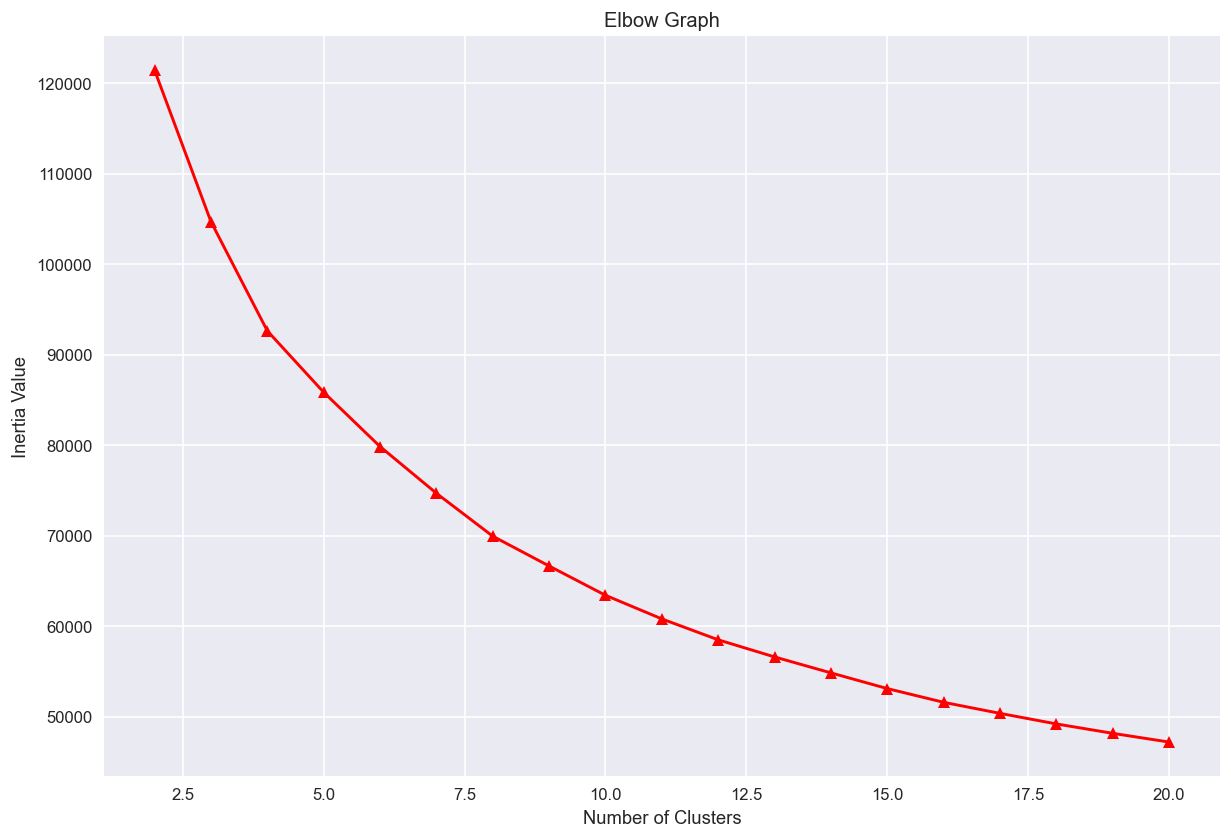

In [93]:
inertia_values = []

for k in range(2, 21):
    scaler = StandardScaler()
    X = scaler.fit_transform(df_2)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(X)
    inertia_values.append(model.inertia_)
    
plt.style.use('seaborn')
plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

In [ ]:
kl = KneeLocator(range(2, 21), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

* Elbow graph did not change at all !

In [ ]:
silhoutte_coefs = []

for k in range(2, 21):
    scaler = StandardScaler()
    X = scaler.fit_transform(df_2)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(X)
    silhoutte_coefs.append(metrics.silhouette_score(X, model.labels_))
    
plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Number of CLusters')
plt.show()


* Also Silhouette score plot remained the same

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df_2)
model = KMeans(n_clusters = 3, **kmeans_constants)
model.fit(X)

In [ ]:
centroids = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_), columns = df_1.columns)

In [ ]:
plt.style.use('default')
i = 1
while i < len(data.columns):
    try:
        fig = plt.figure(figsize = (8, 5), dpi = 120)
        plt.subplot(1,2,1)
        plt.scatter(centroids['BALANCE'], centroids[data.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_2['BALANCE'], df_2[data.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(data.columns[i])
        plt.grid()
        i += 1
        plt.subplot(1,2,2)
        plt.scatter(centroids['BALANCE'], centroids[data.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_2['BALANCE'], df_2[data.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(data.columns[i])
        plt.grid()
        i += 1
    except IndexError:
        break
plt.show()

In [ ]:
print('Inertia : ', model.inertia_)
print('Silhouette Score : ', metrics.silhouette_score(X, model.labels_))

* Metrics improved slightly but the difference is not major by any means.

* Considering the silhouette score and inertia value, it seems that there is still rooms for improvement. Aiming to improe the model, a "Low Variance Filter" is being applied on the data

In [94]:
normalized_data = normalize(df_2)
norm_data = pd.DataFrame(normalized_data, columns = data.columns)
norm_data.var()

BALANCE                             4.765352e-02
BALANCE_FREQUENCY                   4.675371e-08
PURCHASES                           2.726189e-02
ONEOFF_PURCHASES                    1.569307e-02
INSTALLMENTS_PURCHASES              1.215243e-02
CASH_ADVANCE                        4.094858e-02
PURCHASES_FREQUENCY                 2.878704e-08
ONEOFF_PURCHASES_FREQUENCY          4.606084e-09
PURCHASES_INSTALLMENTS_FREQUENCY    2.565937e-08
CASH_ADVANCE_FREQUENCY              3.255513e-09
CASH_ADVANCE_TRX                    1.539531e-06
PURCHASES_TRX                       1.307787e-05
CREDIT_LIMIT                        4.036827e-02
PAYMENTS                            3.815147e-02
MINIMUM_PAYMENTS                    2.406624e-02
PRC_FULL_PAYMENT                    1.329259e-08
TENURE                              7.602120e-06
dtype: float64

* Now from the original dataset, columns with variances lower than 9e-08 are being excluded.

In [95]:
df_3 = df_2.drop(['ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'], axis = 1)

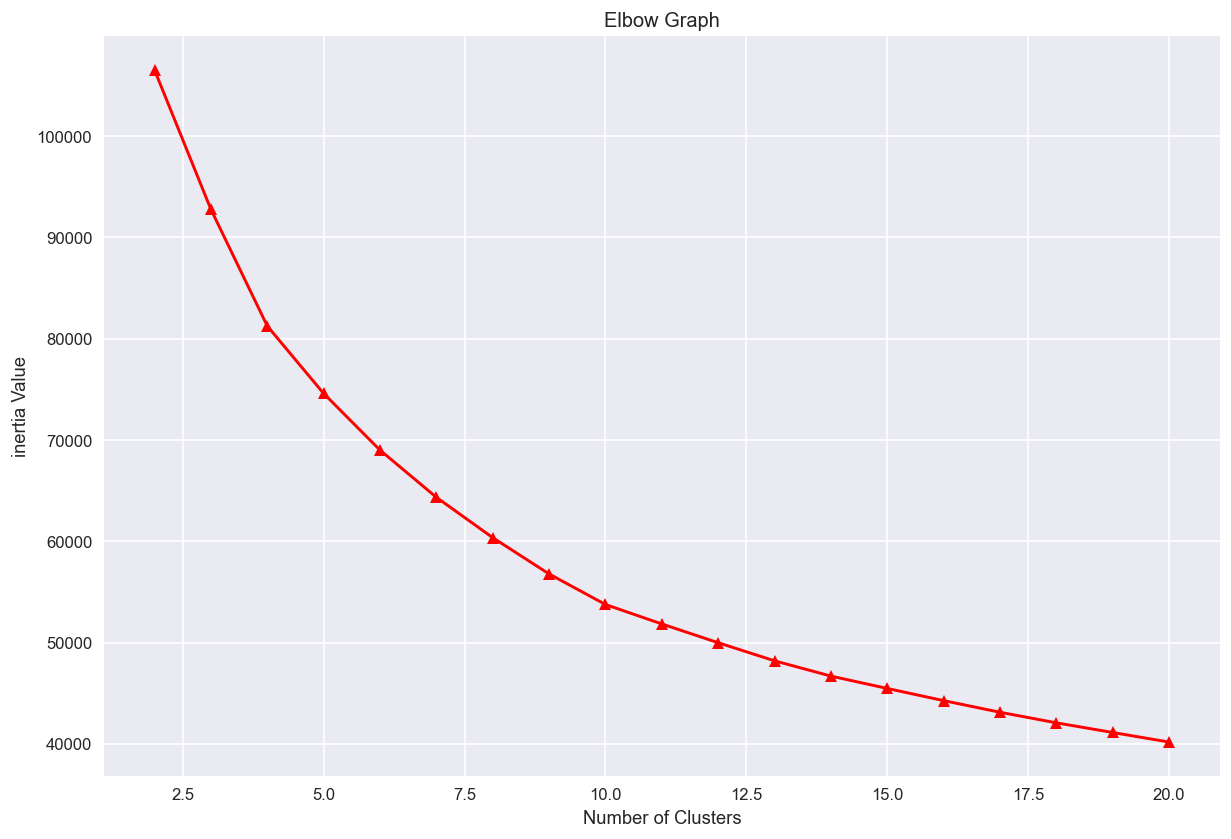

In [96]:
inertia_values = []

for k in range(2, 21):
    scaler = StandardScaler()
    X = scaler.fit_transform(df_3)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(X)
    inertia_values.append(model.inertia_)
    
plt.style.use('seaborn')
plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia Value')
plt.title('Elbow Graph')
plt.show()

In [97]:
kl = KneeLocator(range(2, 21), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

8

* It seems that the low variance filter cannot improve the model based on the elbow graph.

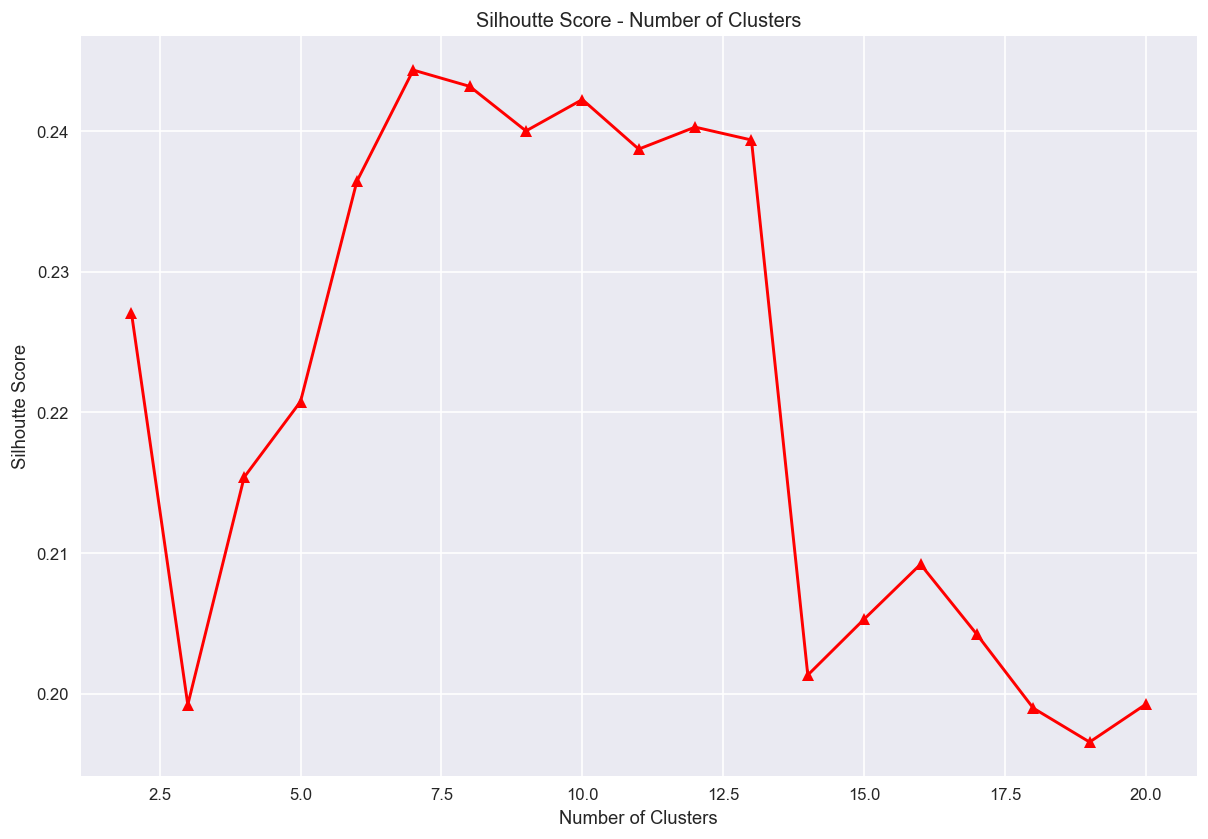

In [98]:
silhoutte_coefs = []

for k in range(2, 21):
    scaler = StandardScaler()
    X = scaler.fit_transform(df_3)
    model = KMeans(n_clusters = k, **kmeans_constants)
    model.fit(X)
    silhoutte_coefs.append(metrics.silhouette_score(X, model.labels_))
    
plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Number of Clusters')
plt.show()

* Unlike the elbow graph, Silhouette score plot changed dramatically. Now the optimum number of clusters in both plots are close to each other and this may be the result of Low Variance Filter. As the difference between 6 clusters and 7 clusters is not much, 6 is our choice.

In [99]:
scaler = StandardScaler()
X = scaler.fit_transform(df_3)
model = KMeans(n_clusters = 6, **kmeans_constants)
model.fit(X)

KMeans(n_clusters=6, n_init=100, random_state=1)

In [100]:
KMeans(n_clusters=6, n_init=100, random_state=1)

KMeans(n_clusters=6, n_init=100, random_state=1)

In [101]:
centroids = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_), columns = df_3.columns)

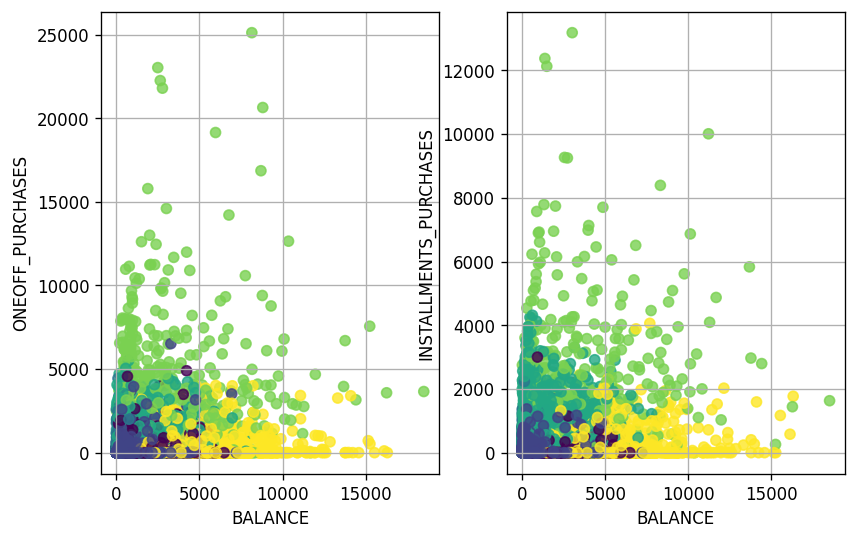

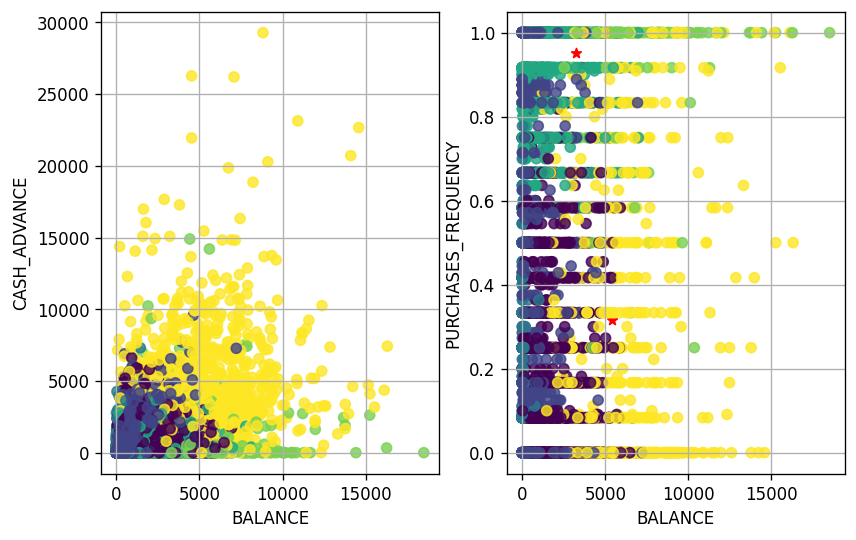

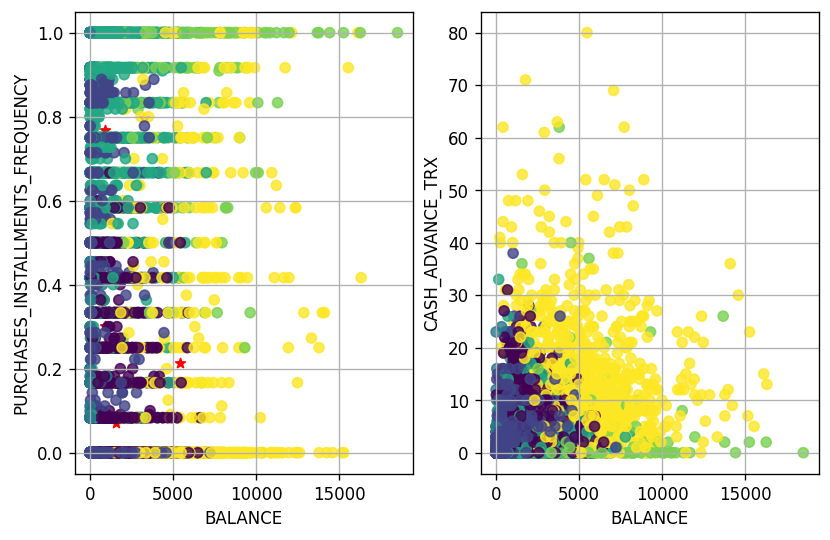

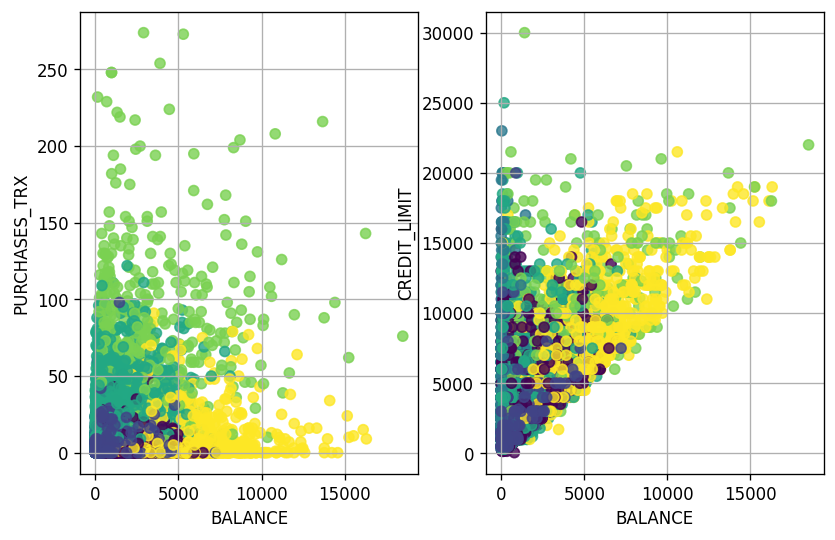

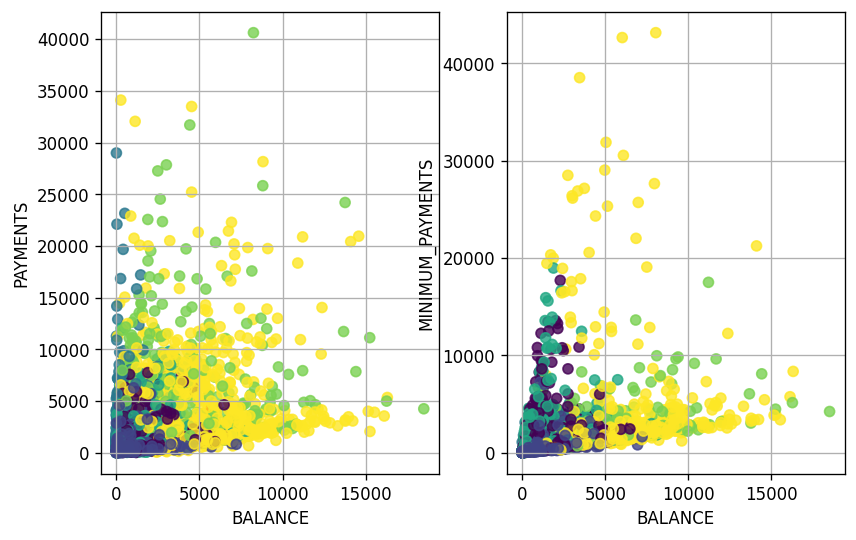

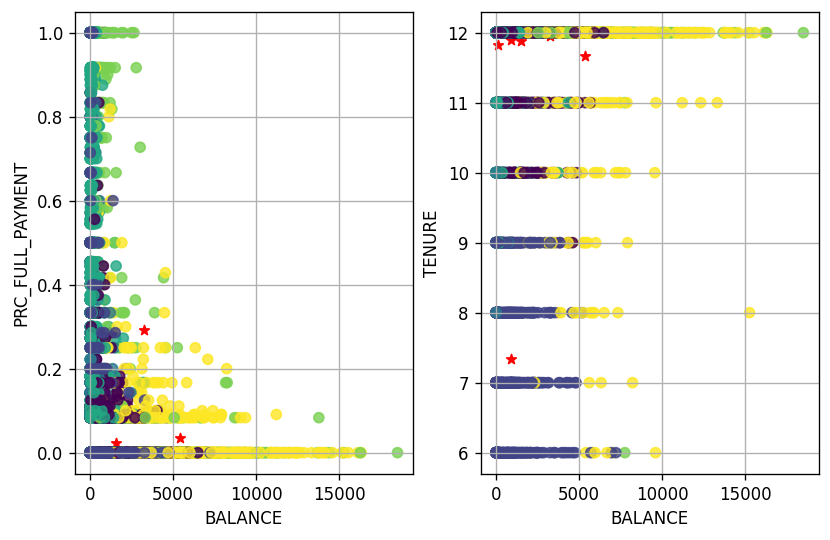

In [102]:
plt.style.use('default')
i = 1
while i < len(df_3.columns):
    try:
        fig = plt.figure(figsize = (8, 5), dpi = 120)
        plt.subplot(1,2,1)
        plt.scatter(centroids['BALANCE'], centroids[df_3.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_3['BALANCE'], df_3[df_3.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(df_3.columns[i])
        plt.grid()
        i += 1
        plt.subplot(1,2,2)
        plt.scatter(centroids['BALANCE'], centroids[df_3.columns[i]], marker = '*', c = 'r')
        plt.scatter(df_3['BALANCE'], df_3[df_3.columns[i]],
                    c = model.labels_.astype(float), alpha = 0.8)
        plt.xlabel('BALANCE')
        plt.ylabel(df_3.columns[i])
        plt.grid()
        i += 1
    except IndexError:
        break
plt.show()


In [103]:
print('Inertia : ', model.inertia_)
print('Silhouette Score : ', metrics.silhouette_score(X, model.labels_))

Inertia :  68998.04542570583
Silhouette Score :  0.23644205861765025


Analyzing the metrics, after applying Low Variance Filter, inertia improved significantly. On the other hand. In addition, Silhouette Score got worse but the difference is not significant. In concluion, it seems that the large number of clusters might end up in an not-meaningful clustering and keeping with less than 6 clusters for this dataset is more efficient

The problem with KMeans algorithm for this dataset is the effect of outliers on the mean value of each feature. Also, the number of outliers are considerably large and removing all of them might have an adverse effect on the model. As a result, a more robust algorithm might be a better choice for performing the clustering on this data.